# Conhecimentos Técnicos - Cientista de Dados Júnior Bix

#### Este projeto é um teste de conhecimento para vaga de cientista de dados junior da empresa Bix<br>
Author: Dorivan Kadatz Borba <br> Coding: utf-8 <br> Language: PT-BR

O que está sendo avaliado:

- Conceitos de Data Science (DS) e Machine Learning (ML);

- Manipulação de dados;

- Estatística básica;

- Criação e avaliação de gráficos;

- Entendimento de negócio.


#### Os data sets contem as seguintes informações.

--> Dados de venda

- ID: identificador único de uma venda

- ProductID: identificador único de um produto

- ClientID: identificador único de um cliente

- Discount: desconto aplicado em uma venda

- UnitPrice: preço unitário de um produto vendido

- Quantity: quantidade de produto vendido em uma venda

- StoreID: identificador único de uma loja

- Date: data de uma venda



--> Dados de consumidores

- ID: identificador único de um consumidor

- City: cidade/localidade onde um consumidor fez a compra

- State: Unidade Federativa onde um consumidor fez a compra

- DateOfBirth: data de nascimento de um consumidor

- Sex: sexo de um consumidor



--> Dados de lojas

- ID: identificador único de uma loja

- Name: cidade/localidade de uma loja

- State: Unidade Federativa de uma loja



--> Dados de produto

- ID: identificador único de um produto

- Name: nome de um produto

- Size: tamanho de um produto

## Importando Pacotes Necessários

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame


import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from matplotlib import style


from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, mean_squared_error
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import cross_val_score, KFold
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

import holidays
from datetime import date

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importando os data sets

In [2]:
# ID do arquivo.
arquivo_id='1Sc6hN48b-lWbDdYNd_t9j8Bt0EZ8BUNG'

# Faz com que o arquivo retorne já no formato csv
# pode retornar uma folha específica de uma planilha basta apenas adicionar o nome da folha ao final do caminho.
csv_output="/gviz/tq?tqx=out:csv&sheet="

# Concatena o link com o id do arquivo e o id da aba do arquivo e retorna os dados no tipo DataFrame
vendas_df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{arquivo_id}{csv_output}sheet1")
produtos_df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{arquivo_id}{csv_output}sheet2")
consumidores_df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{arquivo_id}{csv_output}sheet3")
lojas_df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{arquivo_id}{csv_output}sheet4")

# Limpeza dos dados

In [3]:
# Irei fazer um data frame único, para isso preciso mudar o nome de algumas colunas.
# Renomeia o nome das colunas para o mesmo nome do data frame pincipal.
produtos_df.rename(columns= {'ID':'ProductID'}, inplace=True)
consumidores_df.rename(columns= {'ID':'ClientID'}, inplace=True)
lojas_df.rename(columns= {'ID': 'StoreID'}, inplace=True)

In [4]:
# Faz um join de acordo com o nome da coluna
df = pd.merge(vendas_df, produtos_df, on='ProductID')
df = pd.merge(df, consumidores_df, on='ClientID')
df = pd.merge(df, lojas_df, on='StoreID')

In [5]:
# Resultado do Data Frame principal
df.head()

Unnamed: 0  Unnamed: 1                                ID  \
0         NaN         NaN  80260d682079b6090c8285b398c50d97   
1         NaN         NaN  3275736da1234f55d52bdf09d86b93bc   
2         NaN         NaN  f3513eec8f1434b5b7e04ddf3598df40   
3         NaN         NaN  c330b70c5e60bf56e90ebe09e045f79e   
4         NaN         NaN  961b75f90f3f09b0b5b5526073ec83e7   

                           ProductID  ClientID Discount UnitPrice  Quantity  \
0  002552c0663708129c0019cc97552d7d3     14001     0,08     249,2         1   
1  001b237c0e9bb435f2e54071129237e93     14001      0,1     162,4         1   
2  00066f42aeeb9f3007548bb9d3f33c381     14001      0,1     194,6         1   
3  002552c0663708129c0019cc97552d7d3     14116     0,08     249,2         1   
4  002959d7a0b0990fe2d69988affcbc803     14116      0,1     261,8         2   

   StoreID        Date           Name_x Size      City State_x DateOfBirth  \
0        4  12/10/2018       Tempestade    G  Curitiba      PR   6/28/1985   
1        4   4/25/2019           Thanos    G  Curitiba      PR   6/28/1985   
2        4   7/17/2019  Capitão América    P  Curitiba      PR   6/28/1985   
3        4   12/3/2018       Tempestade    G  Curitiba      PR  10/21/1987   
4        4    5/7/2019          Ciclope    G  Curitiba      PR  10/21/1987   

     Sex    Name_y State_y  
0  Homem  Curitiba      PR  
1  Homem  Curitiba      PR  
2  Homem  Curitiba      PR  
3  Homem  Curitiba      PR  
4  Homem  Curitiba      PR

In [6]:
# Retorna informações como: Tipo dos dados, quantidade de linhas e colunas, se existem valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32753 entries, 0 to 32752
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   0 non-null      float64
 2   ID           32753 non-null  object 
 3   ProductID    32753 non-null  object 
 4   ClientID     32753 non-null  int64  
 5   Discount     32753 non-null  object 
 6   UnitPrice    32753 non-null  object 
 7   Quantity     32753 non-null  int64  
 8   StoreID      32753 non-null  int64  
 9   Date         32753 non-null  object 
 10  Name_x       32753 non-null  object 
 11  Size         32753 non-null  object 
 12  City         32753 non-null  object 
 13  State_x      32753 non-null  object 
 14  DateOfBirth  32753 non-null  object 
 15  Sex          32753 non-null  object 
 16  Name_y       32753 non-null  object 
 17  State_y      32753 non-null  object 
dtypes: float64(2), int64(3), object(13)
memory usa

##### Observações:
Há duas colunas com o mesmo nome porém com significados diferentes, Name_x é o nome do produto, State_x é a UF do cliente, Name_y e State_y é o nome do local de compra, temos duas colunas com os nomes das cidades e UF, a diferença está na compra pelo site com código 22, então por exemplo: o cliente compra em Curitiba prém a compra foi pelo site, o nome da cidade vai ser Curitiba mas o nome da loja vai ser Online e UF vai ser 'na' por definição. A coisa a se fazer é auterar o nome dessas colunas para ficar mais bem apresentável, excluir as primeiras colunas Unnamed, alterar o tipo de algmas colunas, as colunas ID(id da venda) e ProductID também não serão necessárias já que temos os nomes dos produtos em sí, a coluna ClientID ficará para caso seja necessário fazer um agrupamento por cliente, farei também uma nova coluna com o valor total da compra, haja visto que temos valores unitários e quantidade de compra.

In [7]:
# Exclui as colunas desnecessárias.
df.drop(columns= ['Unnamed: 0', 'Unnamed: 1', 'ID', 'ProductID'], inplace=True)

# Renomeia as colunas respectivas.
df.rename(columns={'Date':'PurchaseDate', 'Name_x':'ProductName',
                   'City':'ClientCityName', 'State_x':'ClientStateName', 
                   'Name_y':'StoreCityName', 'State_y':'StoreStateName'}, inplace=True)

In [8]:
# Altera o tipo das colunas respectivas para o tipo Date Time
df[['PurchaseDate', 'DateOfBirth']] = df[['PurchaseDate', 'DateOfBirth']].apply(pd.to_datetime)

# Demorou um pouco para eu perceber que os valores dessas colunas estão com ',' ao invés de '.'
# Isso estava me impedindo de alterar o tipo para Float...Feliz por ter conseguido mas bobo por ser um erro comum :\
# Uma função lambda altera as 'virgulas' para 'ponto' e assim transforma para o tipo float e aplica para todos os valores.
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: float(x.split()[0].replace(',', '.')))

# Devo fazer em uma coluna por vez já que a função 'split' não aceita trabalhar com arquivos do tipo 'Series'.
df['Discount'] = df['Discount'].apply(lambda x: float(x.split()[0].replace(',', '.')))

# Altera os valores das colunas para o tipo object
df[['StoreID','ClientID']] = df[['StoreID','ClientID']].astype(object)

In [9]:
# Adiciona uma nova coluna com o valor total da compra
df['TotalPurchase'] = df['UnitPrice'] * df['Quantity']

# Adiciona uma nova coluna com o valor da idade do cliente, diferença entre a data de nascimento com a data da compra
df['YearsOld'] = (df['PurchaseDate'] - df['DateOfBirth']) / np.timedelta64(1, 'Y')

# arredonda para baixo os valores da coluna YearsOld 
df['YearsOld'] = df['YearsOld'].apply(np.floor).astype(int)

In [10]:
df.columns

Index(['ClientID', 'Discount', 'UnitPrice', 'Quantity', 'StoreID',
       'PurchaseDate', 'ProductName', 'Size', 'ClientCityName',
       'ClientStateName', 'DateOfBirth', 'Sex', 'StoreCityName',
       'StoreStateName', 'TotalPurchase', 'YearsOld'],
      dtype='object')

In [11]:
# Altera a posição das colunas no Data Frame
df = df[['ClientID', 'Discount', 'UnitPrice', 'Quantity', 'TotalPurchase', 'StoreID',
        'PurchaseDate', 'ProductName', 'Size', 'ClientCityName','ClientStateName',
        'DateOfBirth', 'YearsOld', 'Sex', 'StoreCityName','StoreStateName']]

# Seta a data de compra como index
df.set_index('PurchaseDate', inplace=True)

In [12]:
# Visualiza o Data Frame.
df

ClientID  Discount  UnitPrice  Quantity  TotalPurchase StoreID  \
PurchaseDate                                                                  
2018-12-10      14001      0.08      249.2         1          249.2       4   
2019-04-25      14001      0.10      162.4         1          162.4       4   
2019-07-17      14001      0.10      194.6         1          194.6       4   
2018-12-03      14116      0.08      249.2         1          249.2       4   
2019-05-07      14116      0.10      261.8         2          523.6       4   
...               ...       ...        ...       ...            ...     ...   
2019-12-30      15848      0.08      117.6         1          117.6      22   
2018-07-20      14915      0.10      117.6         1          117.6      22   
2018-05-12      21719      0.10      117.6         1          117.6      22   
2019-03-20      17890      0.10      686.0         1          686.0      22   
2019-09-26      26086      0.10      148.4         1          148.4      22   

                   ProductName Size  ClientCityName ClientStateName  \
PurchaseDate                                                          
2018-12-10          Tempestade    G        Curitiba              PR   
2019-04-25              Thanos    G        Curitiba              PR   
2019-07-17     Capitão América    P        Curitiba              PR   
2018-12-03          Tempestade    G        Curitiba              PR   
2019-05-07             Ciclope    G        Curitiba              PR   
...                        ...  ...             ...             ...   
2019-12-30                Thor    P  Barra do corda              MA   
2018-07-20                Thor    P  Belo Horizonte              BH   
2018-05-12                Thor    P  Belo Horizonte              BH   
2019-03-20            BIXDream    M  Belo Horizonte              BH   
2019-09-26    Mulher-Maravilha    P  Belo Horizonte              BH   

             DateOfBirth  YearsOld    Sex StoreCityName StoreStateName  
PurchaseDate                                                            
2018-12-10    1985-06-28        33  Homem      Curitiba             PR  
2019-04-25    1985-06-28        33  Homem      Curitiba             PR  
2019-07-17    1985-06-28        34  Homem      Curitiba             PR  
2018-12-03    1987-10-21        31  Homem      Curitiba             PR  
2019-05-07    1987-10-21        31  Homem      Curitiba             PR  
...                  ...       ...    ...           ...            ...  
2019-12-30    1989-07-18        30  Homem        Online             na  
2018-07-20    1971-12-17        46  Homem        Online             na  
2018-05-12    1983-08-11        34  Homem        Online             na  
2019-03-20    1968-09-30        50  Homem        Online             na  
2019-09-26    1990-10-03        28  Homem        Online             na  

[32753 rows x 15 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32753 entries, 2018-12-10 to 2019-09-26
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ClientID         32753 non-null  object        
 1   Discount         32753 non-null  float64       
 2   UnitPrice        32753 non-null  float64       
 3   Quantity         32753 non-null  int64         
 4   TotalPurchase    32753 non-null  float64       
 5   StoreID          32753 non-null  object        
 6   ProductName      32753 non-null  object        
 7   Size             32753 non-null  object        
 8   ClientCityName   32753 non-null  object        
 9   ClientStateName  32753 non-null  object        
 10  DateOfBirth      32753 non-null  datetime64[ns]
 11  YearsOld         32753 non-null  int32         
 12  Sex              32753 non-null  object        
 13  StoreCityName    32753 non-null  object        
 14  StoreStateName   3275

# Análise de dados

In [14]:
df.describe()

Discount     UnitPrice      Quantity  TotalPurchase      YearsOld
count  32753.000000  32753.000000  32753.000000   32753.000000  32753.000000
mean       0.093012    221.644967      1.058651     234.753879     39.908253
std        0.009536    112.535304      0.239606     133.329211     11.944418
min        0.080000    114.800000      1.000000     114.800000     17.000000
25%        0.080000    161.000000      1.000000     161.000000     31.000000
50%        0.100000    204.400000      1.000000     204.400000     38.000000
75%        0.100000    233.800000      1.000000     233.800000     48.000000
max        0.100000    686.000000      3.000000    1372.000000     68.000000

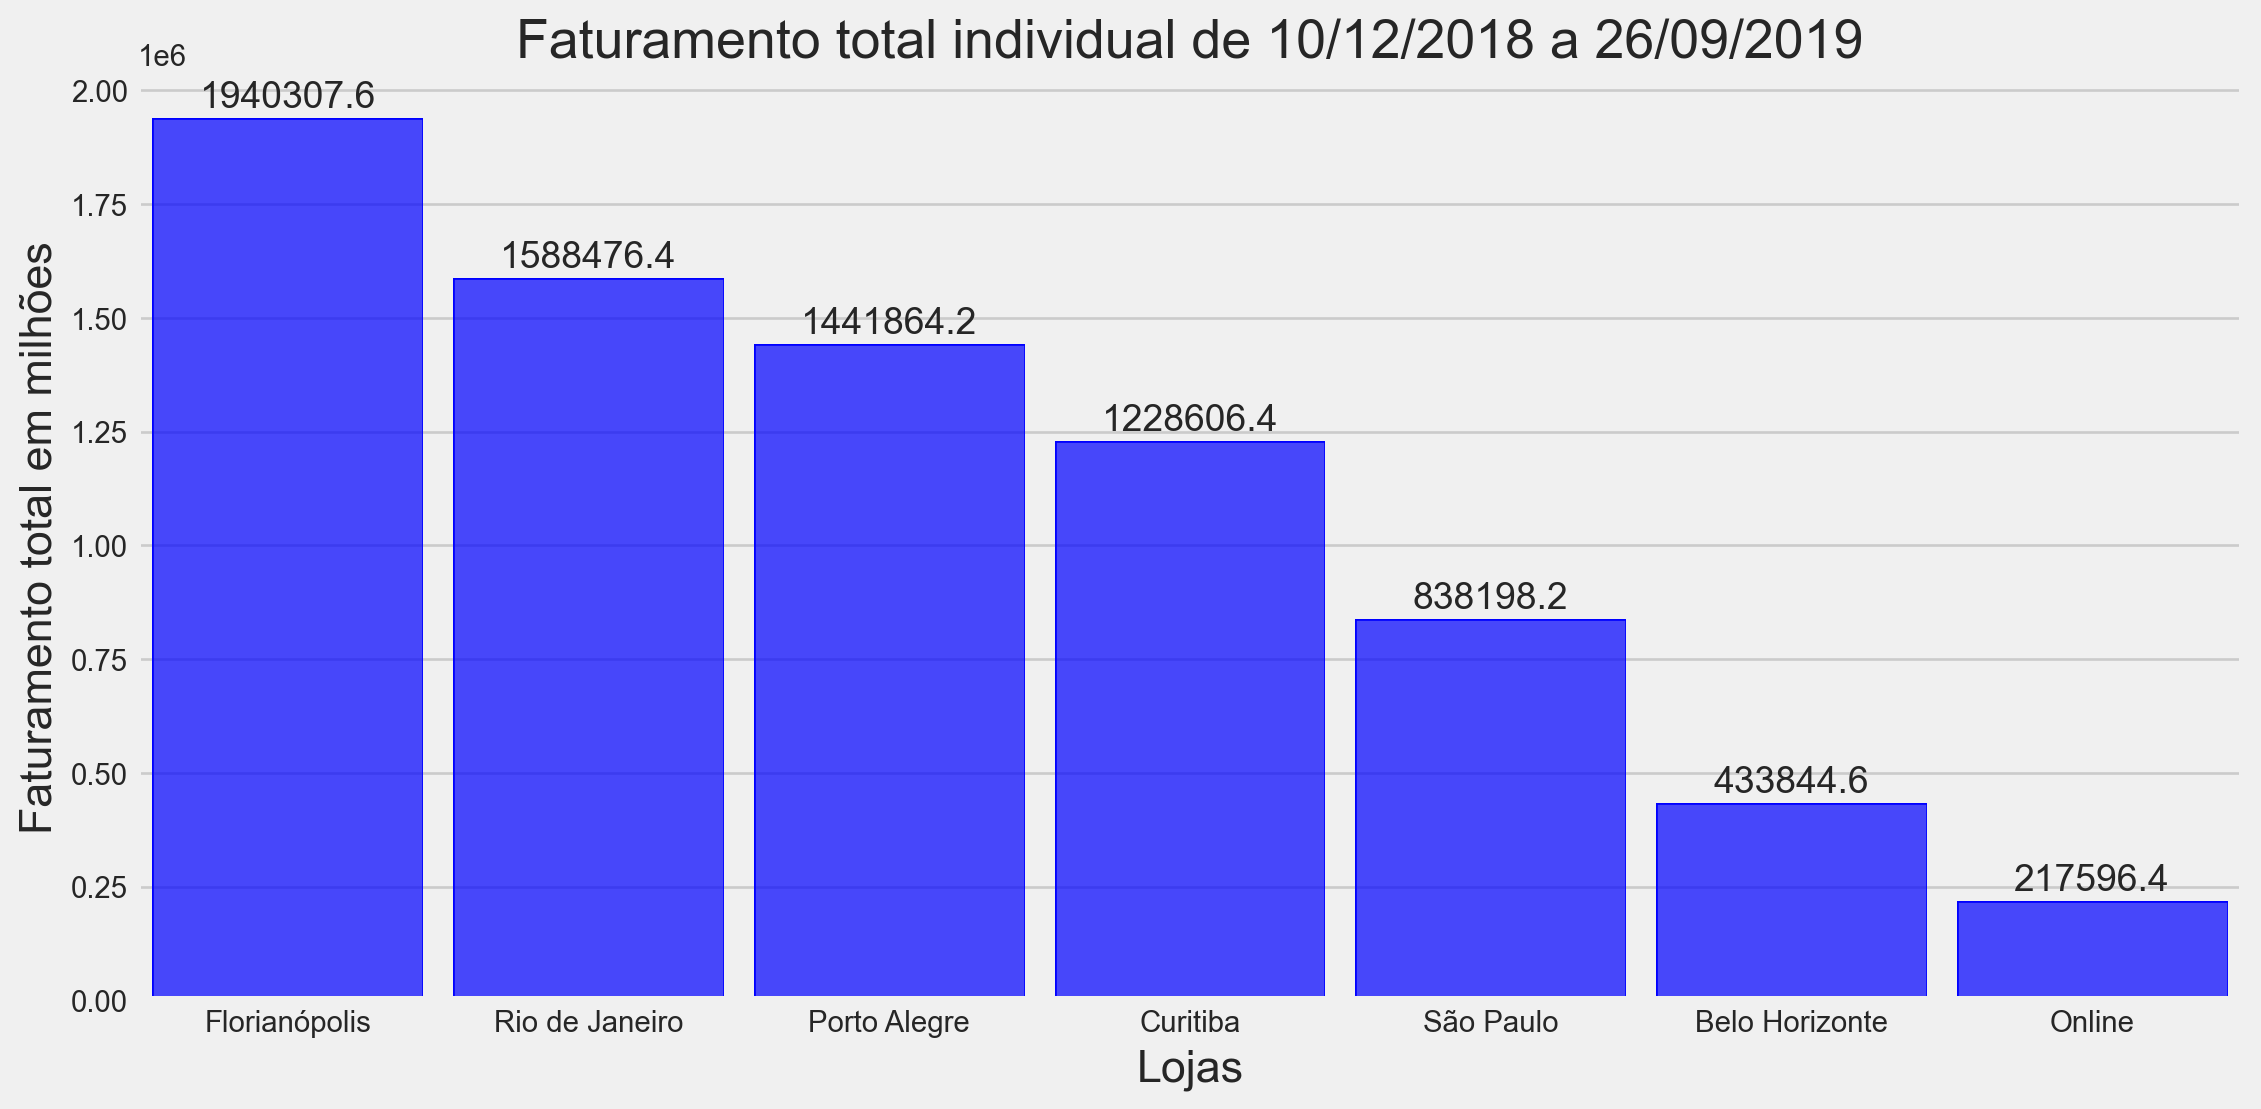

In [15]:
fig = (
    df[['StoreCityName','TotalPurchase']].groupby('StoreCityName').sum()
    .sort_values('TotalPurchase', ascending=False).reset_index()
    .pipe(so.Plot, x='StoreCityName', y='TotalPurchase', text='TotalPurchase')
    .add(so.Bar(width=0.9, color='blue'))
    .label(x="Lojas", y="Faturamento total em milhões", title='Faturamento total individual de 10/12/2018 a 26/09/2019')
    .layout(size=(12, 6))
    .add(so.Text(valign='baseline'))
)
fig.theme({**style.library["fivethirtyeight"]})

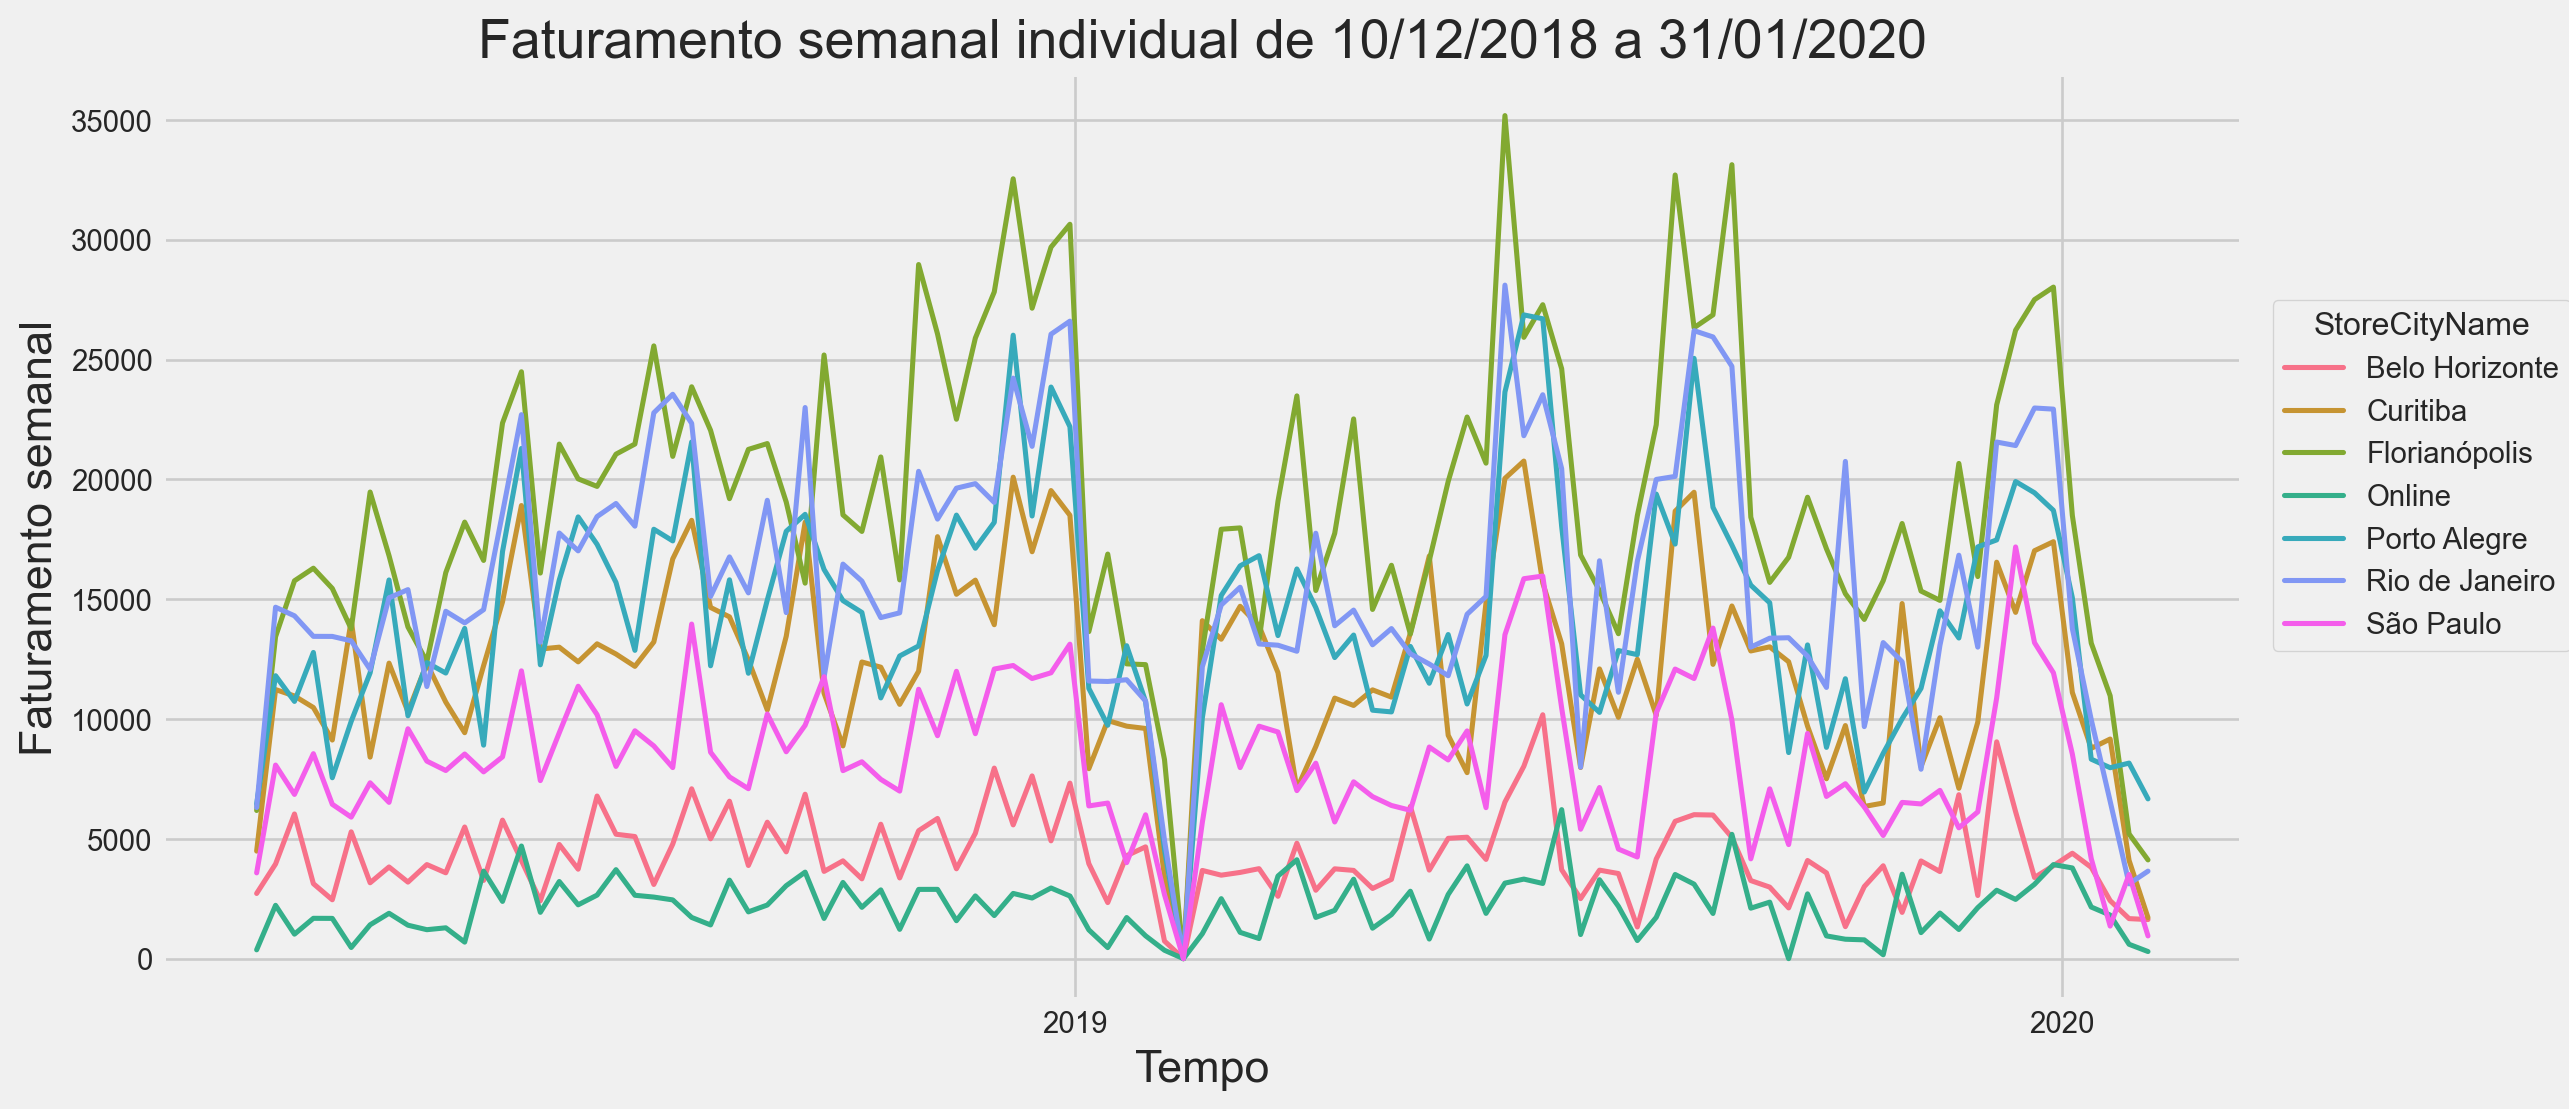

In [16]:
fig = (
    df[['StoreCityName','TotalPurchase']].groupby('StoreCityName').resample('W').sum().reset_index()
    .pipe(so.Plot, x='PurchaseDate', y='TotalPurchase', color='StoreCityName')
    .add(so.Lines(linewidth=1.9), so.Agg())
    .label(x='Tempo', y="Faturamento semanal", title='Faturamento semanal individual de 10/12/2018 a 31/01/2020')
    .layout(size=(12, 6))
)
fig.theme({**style.library["fivethirtyeight"]})

In [17]:
pd.DataFrame(df[['StoreCityName','TotalPurchase']].resample('D').sum()).query('TotalPurchase == 0')

TotalPurchase
PurchaseDate               
2019-02-01              0.0
2019-02-02              0.0
2019-02-03              0.0
2019-02-04              0.0
2019-02-05              0.0
2019-02-06              0.0
2019-02-07              0.0
2019-02-08              0.0
2019-02-09              0.0
2019-02-10              0.0
2019-02-11              0.0
2019-02-12              0.0

In [18]:
print("Estatistica de venda semanal da rede de lojas Bix Dream")
df[['StoreCityName','TotalPurchase']].groupby('StoreCityName').resample('W').sum().reset_index().describe()

Estatistica de venda semanal da rede de lojas Bix Dream


TotalPurchase
count     707.000000
mean    10875.380198
std      7108.028542
min         0.000000
25%      4206.300000
50%     10610.600000
75%     15672.300000
max     35177.800000

In [19]:
print(f'Coeficiente de variação: {((7108.028542 / 10875.380198) * 100):.2f}%')

Coeficiente de variação: 65.36%


### Observações:
- Temos 22 meses de dados registrados.
- As lojas físicas faturaram mais do que a loja online, a loja física que menos faturou (Belo Horizonte) obteve o dobro  do faturamento da loja online durante o período registrado.
- Há uma forte queda em fevereiro em todos os estabelecimentos durante 12 dias, poderia ser recesso de férias?.
- Os dados de faturamento não mostram uma tendencia clara, quando os dados são semanalmente agrupados a variação é alta, varia 65.36% em tono da média, o que nos da fortes indícios de uma serie temporal estacionária e heterogênia.

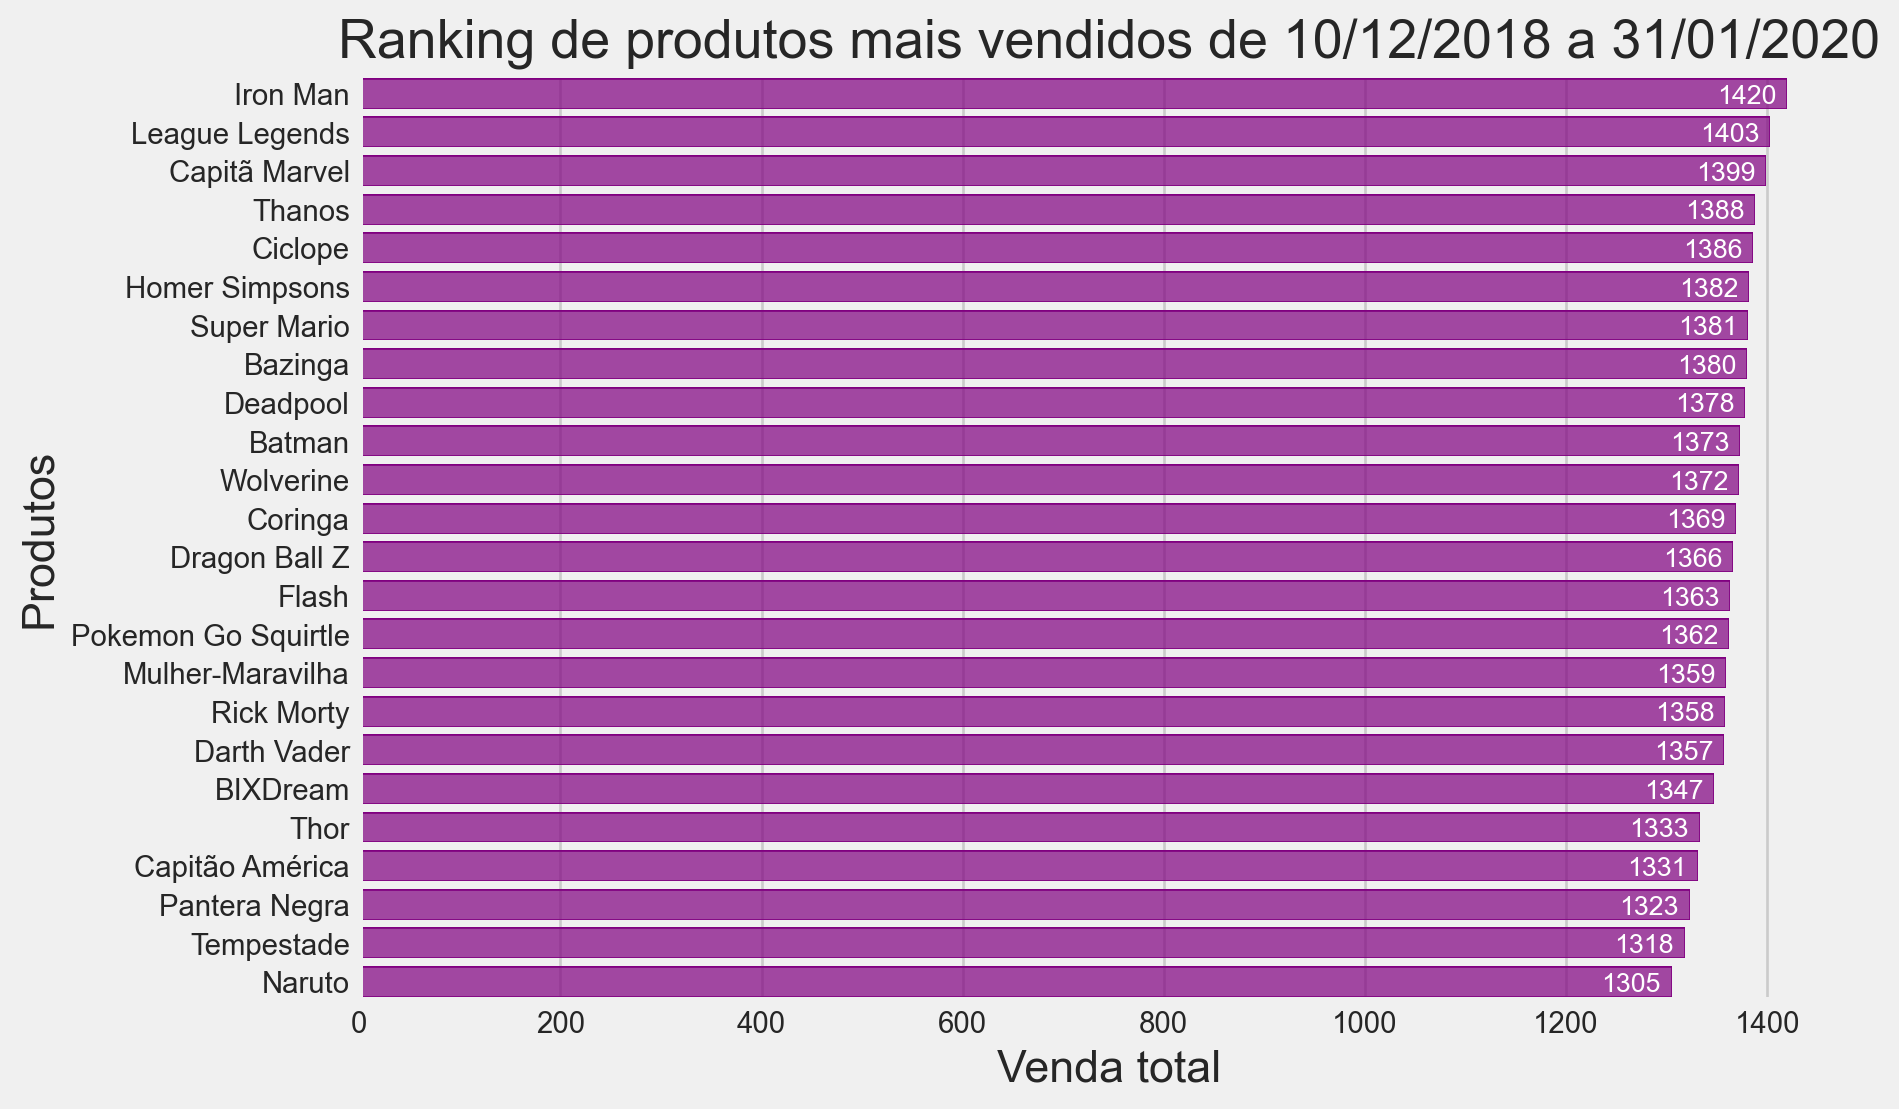

In [21]:
fig = (
    pd.DataFrame(df.groupby('ProductName')['ProductName'].count())
    .rename(columns={'ProductName':'quantidade'}).reset_index().sort_values(by='quantidade', ascending=False)
    .pipe(so.Plot, y='ProductName', x='quantidade', text='quantidade')
    .add(so.Bar(color='purple'))
    .label(y='Produtos', x="Venda total",
           title='Ranking de produtos mais vendidos de 10/12/2018 a 31/01/2020')
    .layout(size=(10, 6))
    .add(so.Text(halign="right", color="white", fontsize=10))
)
fig.theme({**style.library["fivethirtyeight"]})

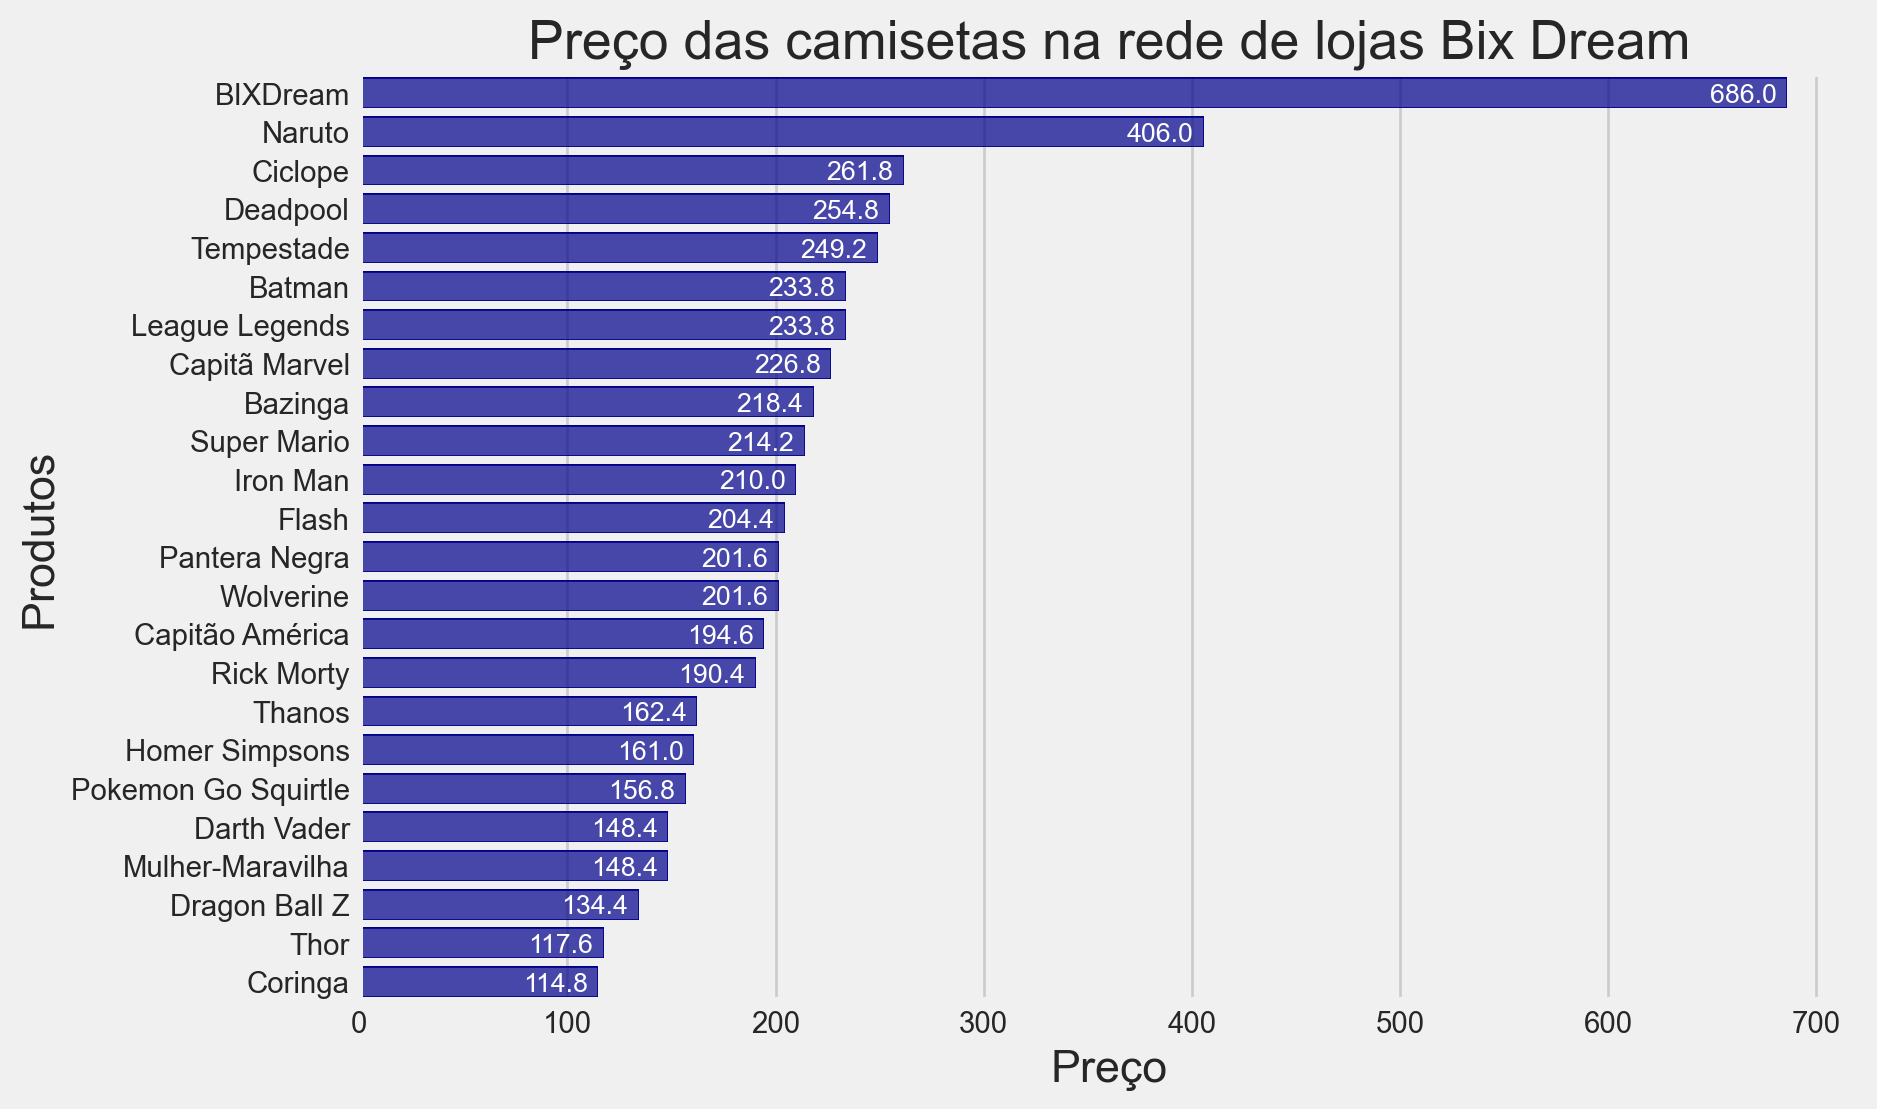

In [22]:
fig = (
    pd.DataFrame(df[['ProductName', 'UnitPrice']]).drop_duplicates().sort_values(by='UnitPrice', ascending=False)
    .pipe(so.Plot, y='ProductName', x='UnitPrice', text='UnitPrice')
    .add(so.Bar(color='darkblue'))
    .label(y='Produtos', x="Preço",
           title='Preço das camisetas na rede de lojas Bix Dream')
    .layout(size=(10, 6))
    .add(so.Text(halign="right", color="white", fontsize=10))
)
fig.theme({**style.library["fivethirtyeight"]})

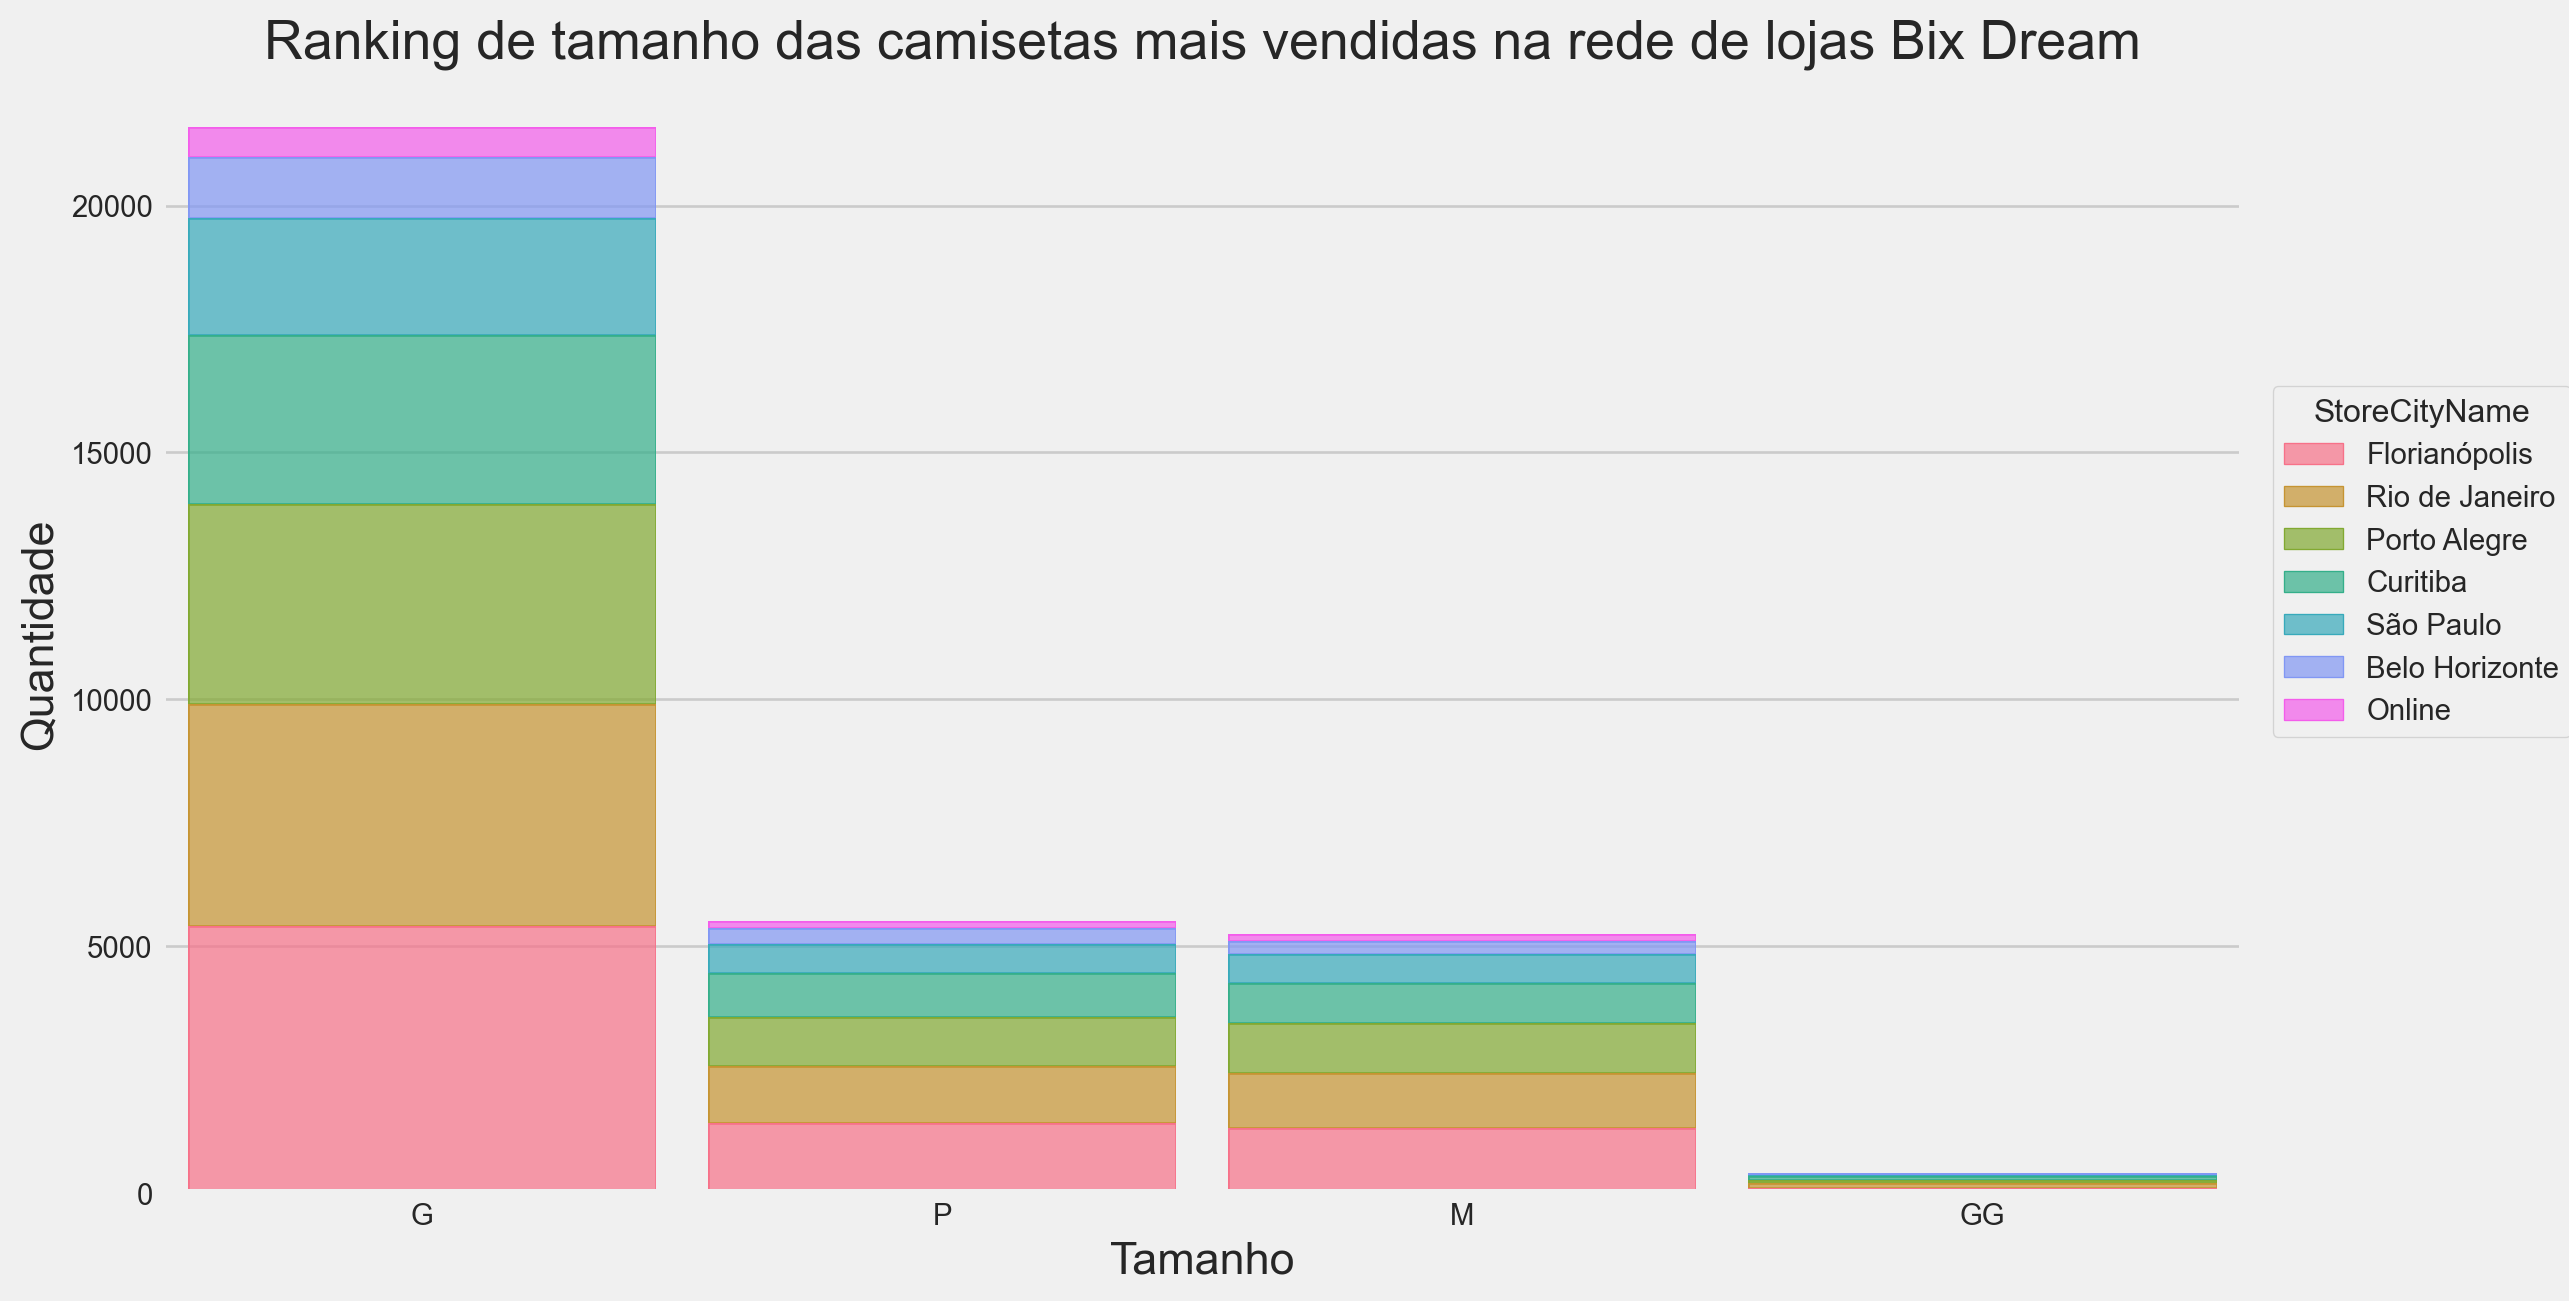

In [23]:
fig = (
    pd.DataFrame(df.groupby(['StoreCityName','Size'])['Size'].count())
    .rename( columns={'Size':'count'}).reset_index().sort_values(by='count', ascending=False)
    .pipe(so.Plot, x='Size', y='count', color='StoreCityName')
    .add(so.Bar(width=0.9), so.Stack())
    .label(x="Tamanho", y="Quantidade", title='Ranking de tamanho das camisetas mais vendidas na rede de lojas Bix Dream')
    .layout(size=(12, 7))
)
fig.theme({**style.library["fivethirtyeight"]})

### Observações
- Em geral não tem tanta diferença entre as camisetas mais vendidas em todas as lojas somadas, a diferença na quantidade de vendas de um modelo para outro é menos de 10, já se observarmos em cada loja temos uma certa diferença, cada loja tem uma camiseta diferente mais vendidas, vemos League of Leagends aparecendo entre os top 3 de três lojas: Belo Horizonte, São Paulo e Porto Alegre. A camiseta do Iron Man é a mais vendida somando todas as lojas, porém ela aparece no top 2 apenas no Rio de Janeiro.
- O tamanho predominante é o G em todas as lojas, chegando vender até 4x mais do que os tamanhos P e M. Os tamanhos P e M são bem próximos na quantidade de vendas, o tamanho GG tem poucas vendas, entre 10% ~ 15% a menos da quantidade do tamanho M.

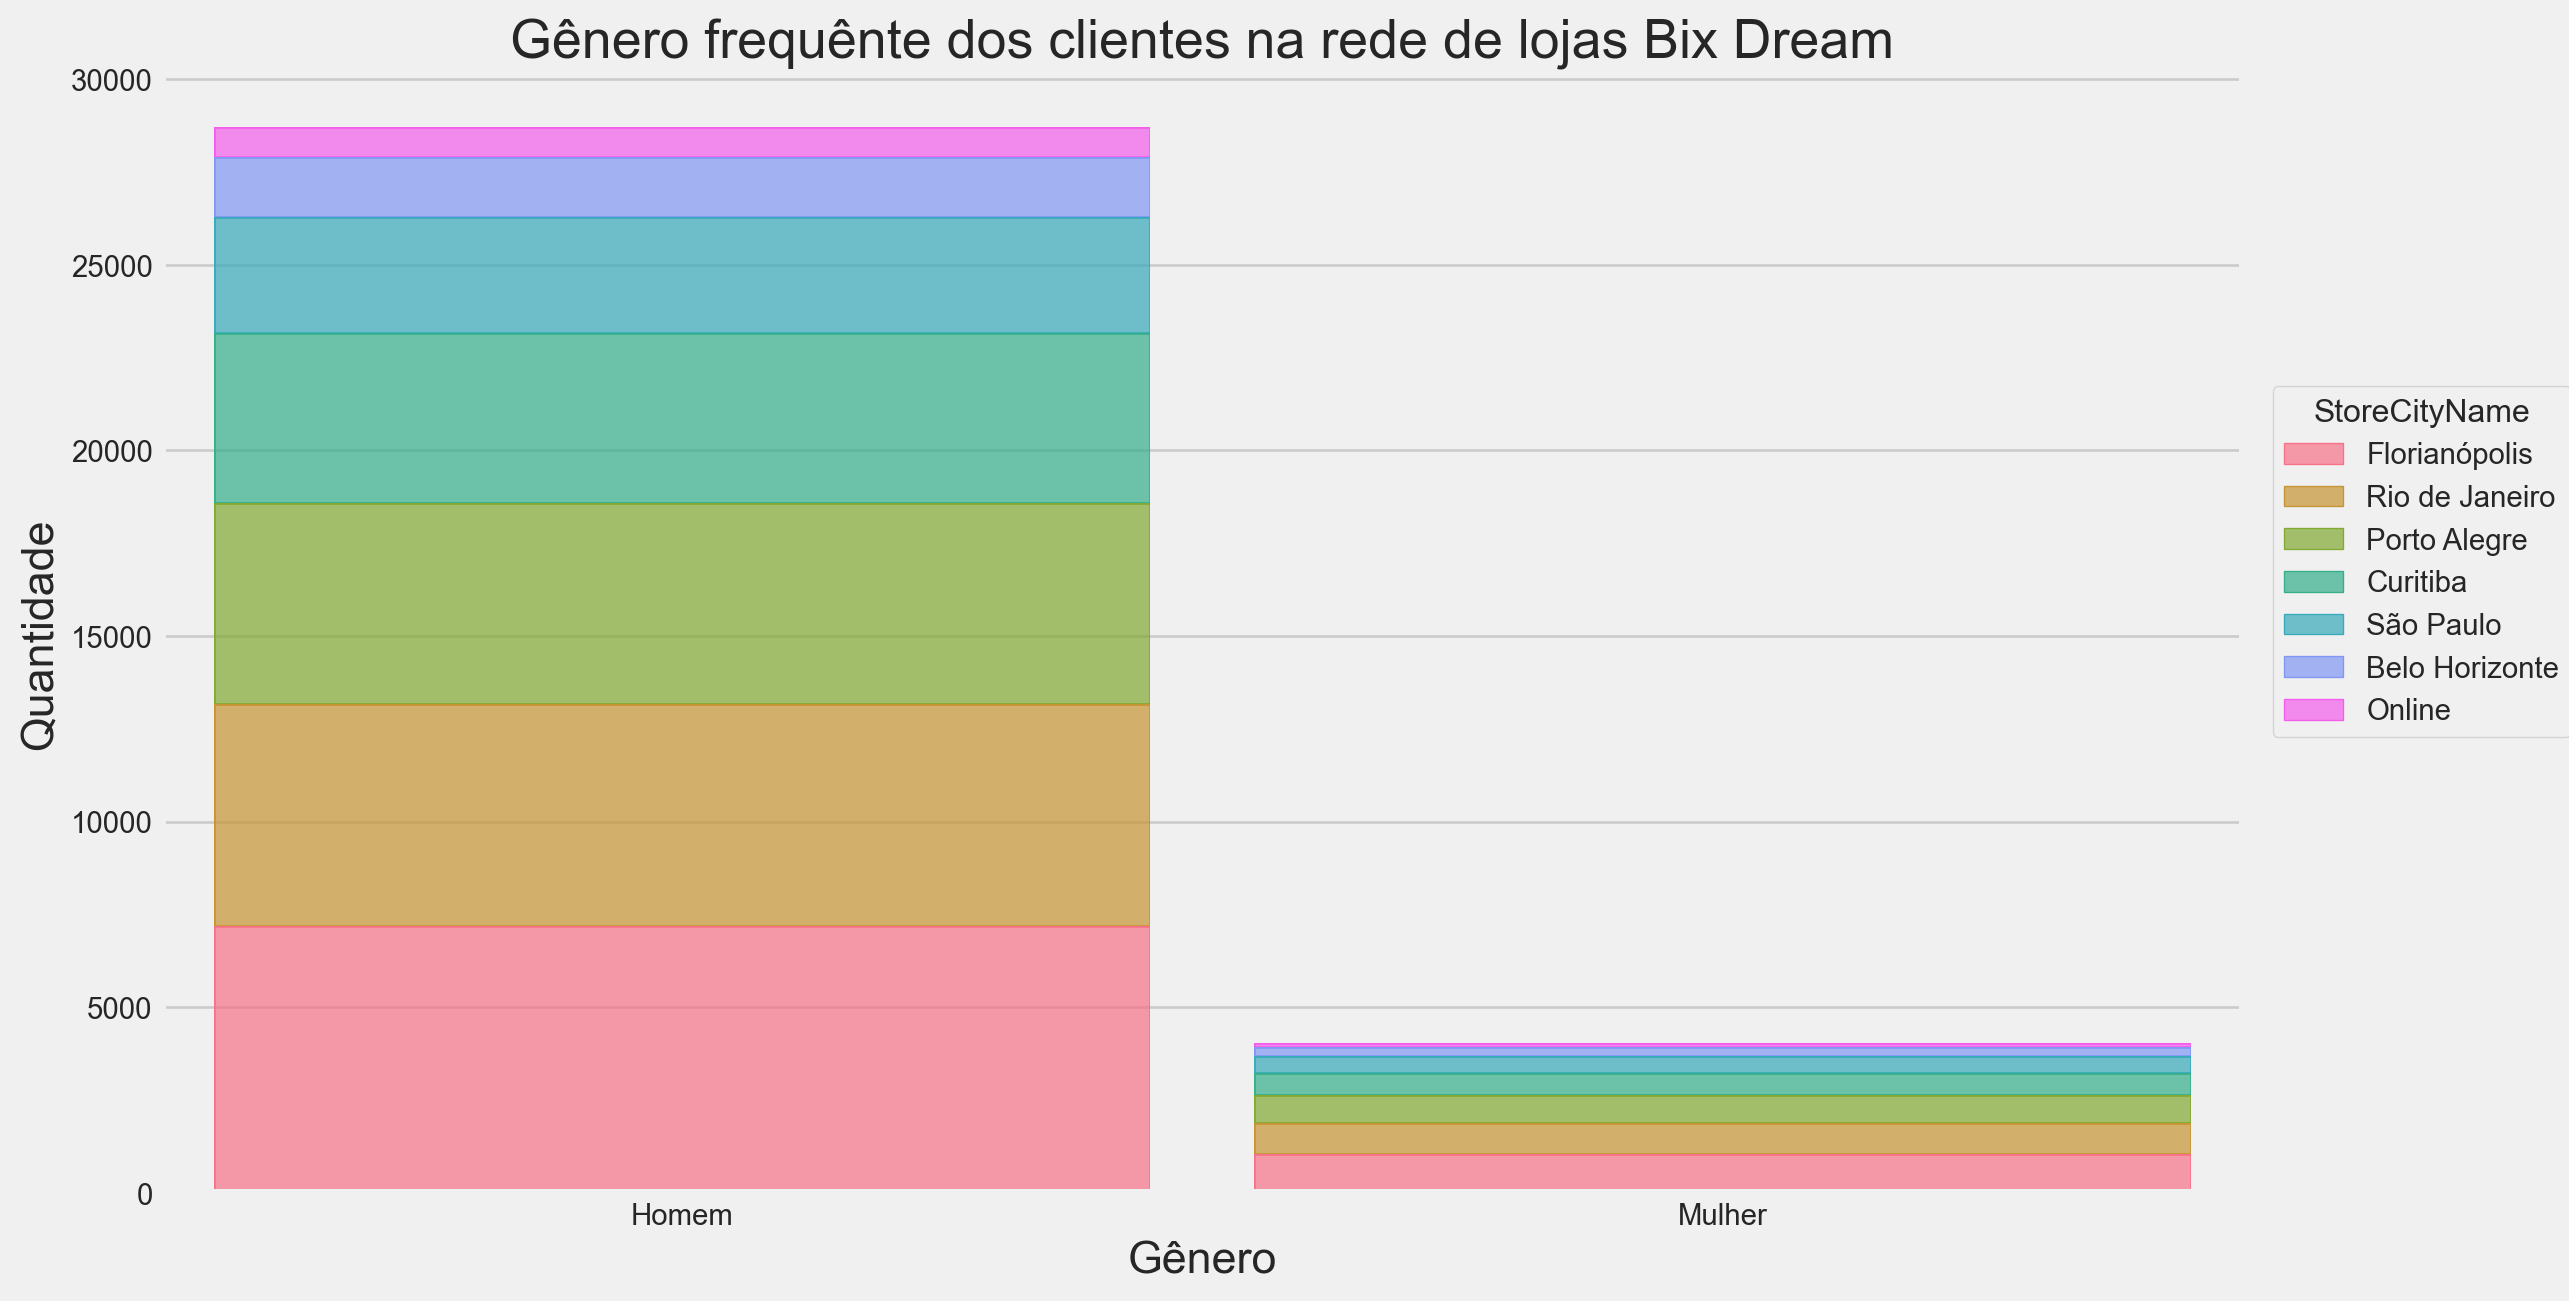

In [24]:
fig = (
    pd.DataFrame(df.groupby(['StoreCityName','Sex'])['Sex'].count())
    .rename( columns={'Sex':'count'}).reset_index().sort_values(by='count', ascending=False)
    .pipe(so.Plot, x='Sex', y='count', color='StoreCityName')
    .add(so.Bar(width=0.9), so.Stack())
    .label(x="Gênero", y="Quantidade", title='Gênero frequênte dos clientes na rede de lojas Bix Dream')
    .layout(size=(12, 7))
)
fig.theme({**style.library["fivethirtyeight"]})

In [25]:
pd.DataFrame(df['YearsOld']).describe()

YearsOld
count  32753.000000
mean      39.908253
std       11.944418
min       17.000000
25%       31.000000
50%       38.000000
75%       48.000000
max       68.000000

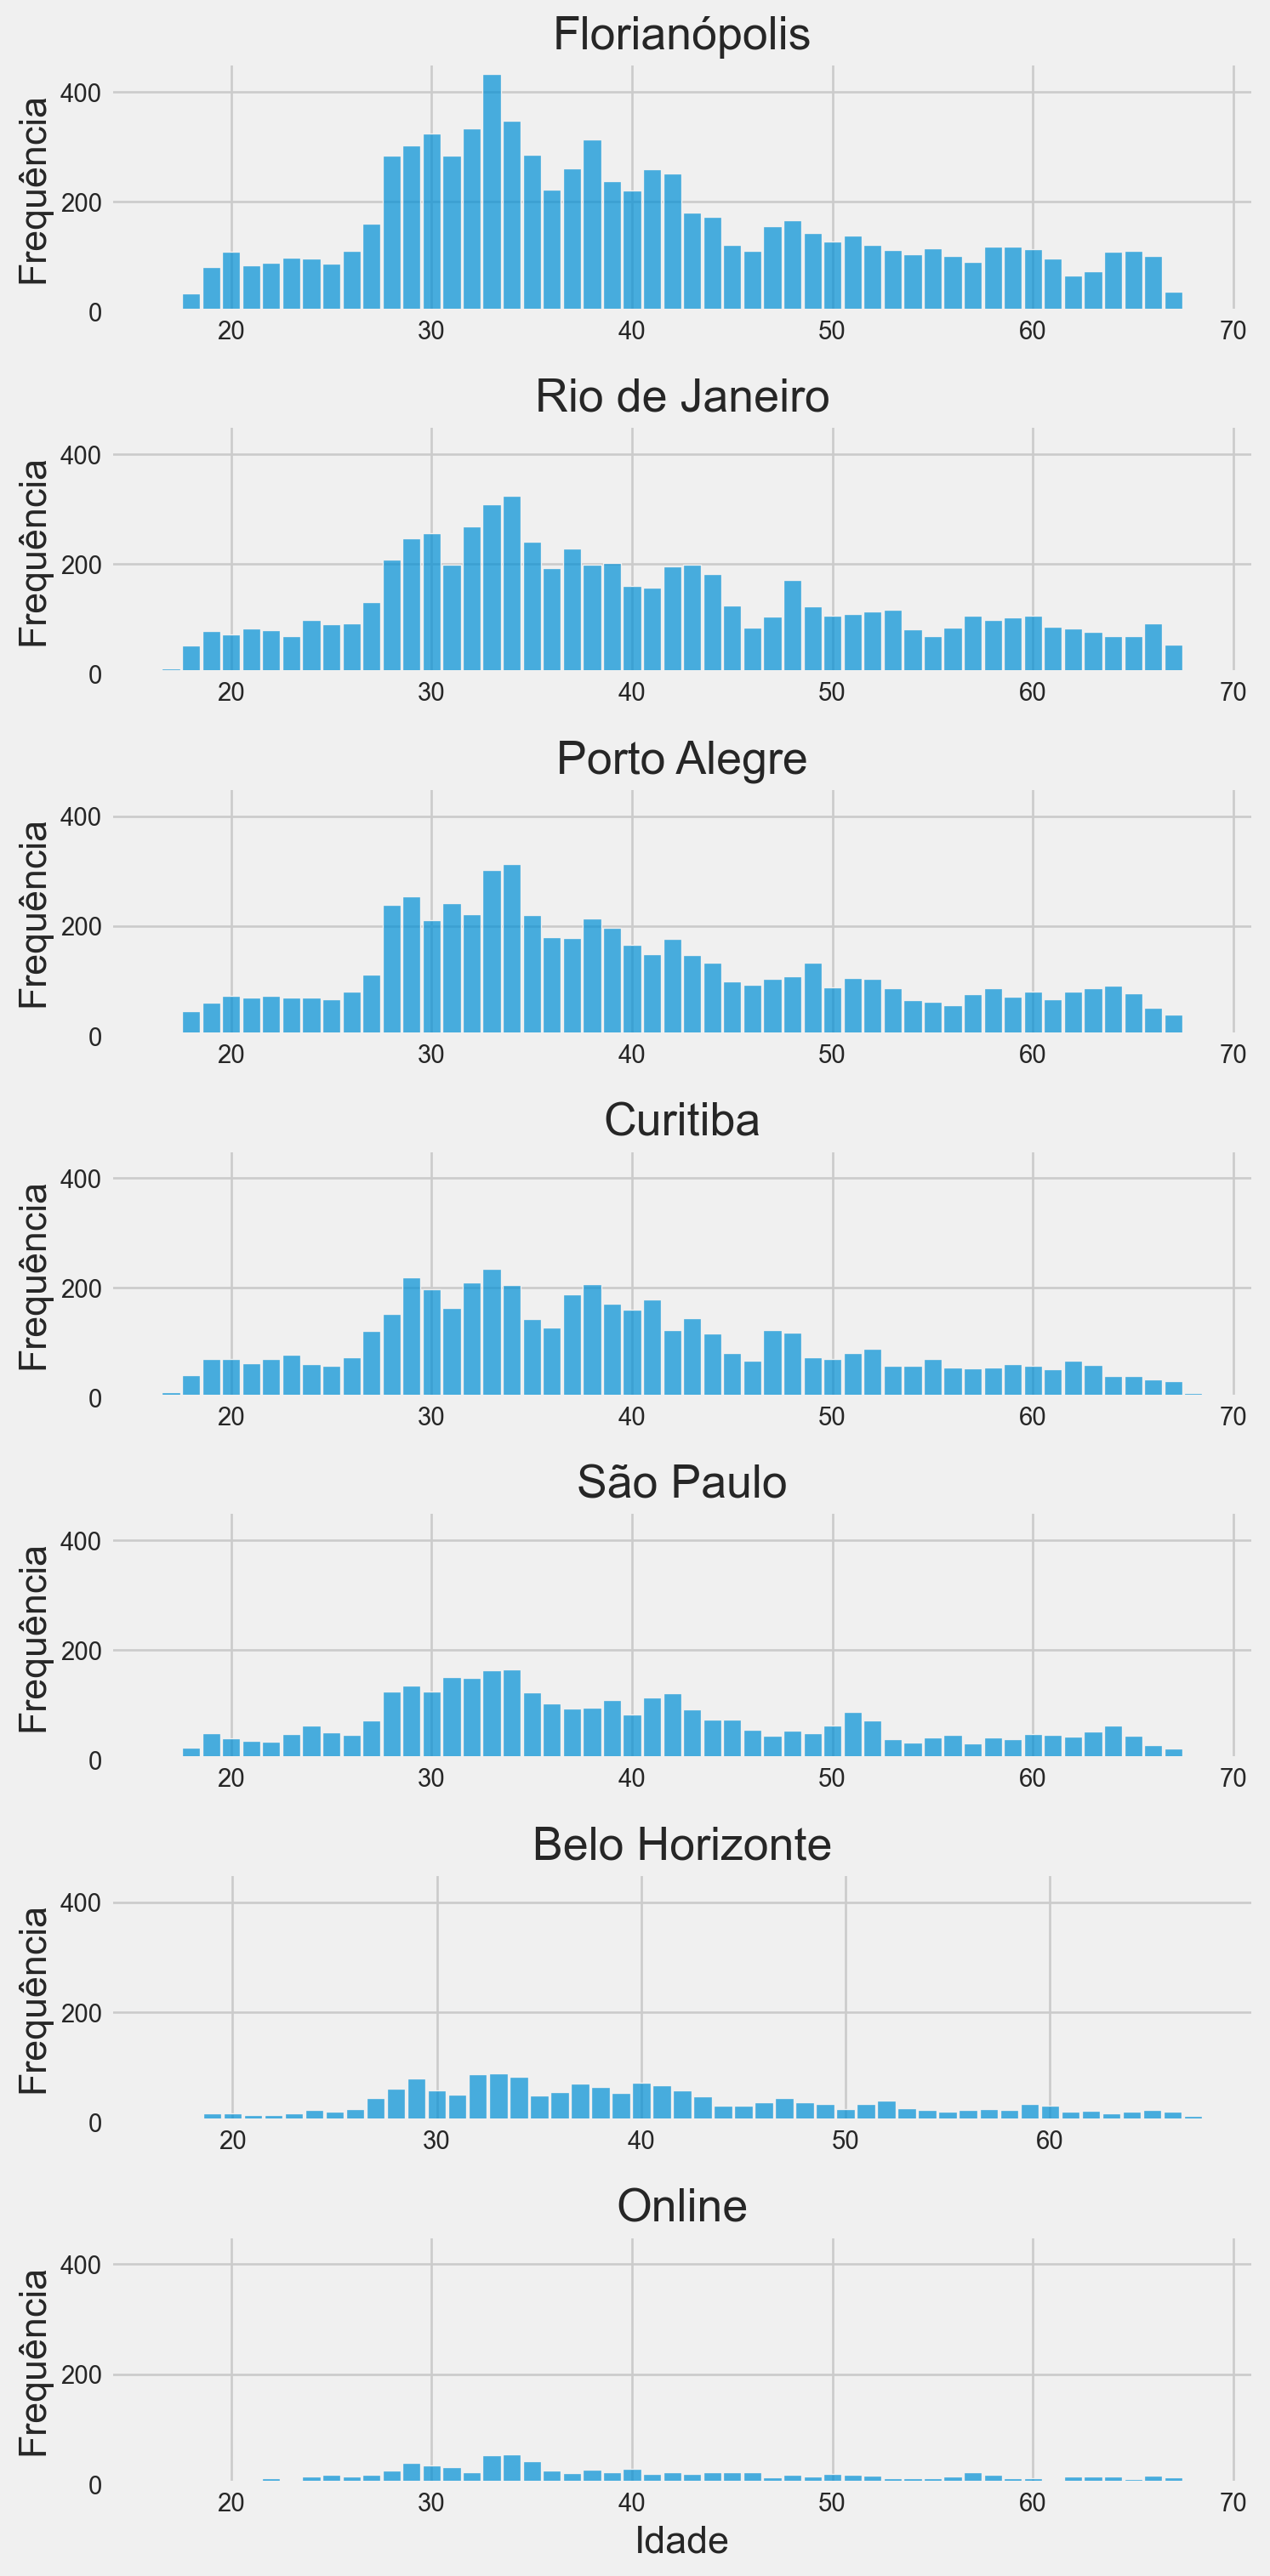

In [26]:
fig = (
    pd.DataFrame(df.groupby(['StoreCityName','YearsOld'])['YearsOld'].count())
    .rename( columns={'YearsOld':'count'}).reset_index().sort_values(by='count', ascending=False)
    .pipe(so.Plot, x='YearsOld', y='count')
    .facet(row="StoreCityName")
    .add(so.Bars(width=0.9))
    .label(x="Idade", y="Frequência")
    .share(x=False)
    .layout(size=(8, 16))
)
fig.theme({**style.library["fivethirtyeight"]})

In [27]:
# Query para retornar a porcentagem de clientes em cada estado que compra na loja online
percent = []
for c in df.query("StoreCityName == 'Online'")['ClientStateName'].unique():
    loop = round(df.query("ClientStateName == @c & StoreCityName == 'Online' ")['ClientID'].count() /
           df.query("StoreCityName == 'Online' ")['ClientID'].count() * 100, 2)
    percent.append(f"{loop}%")
# Ordena a lista do maior para o menor
percent.sort(reverse=True)

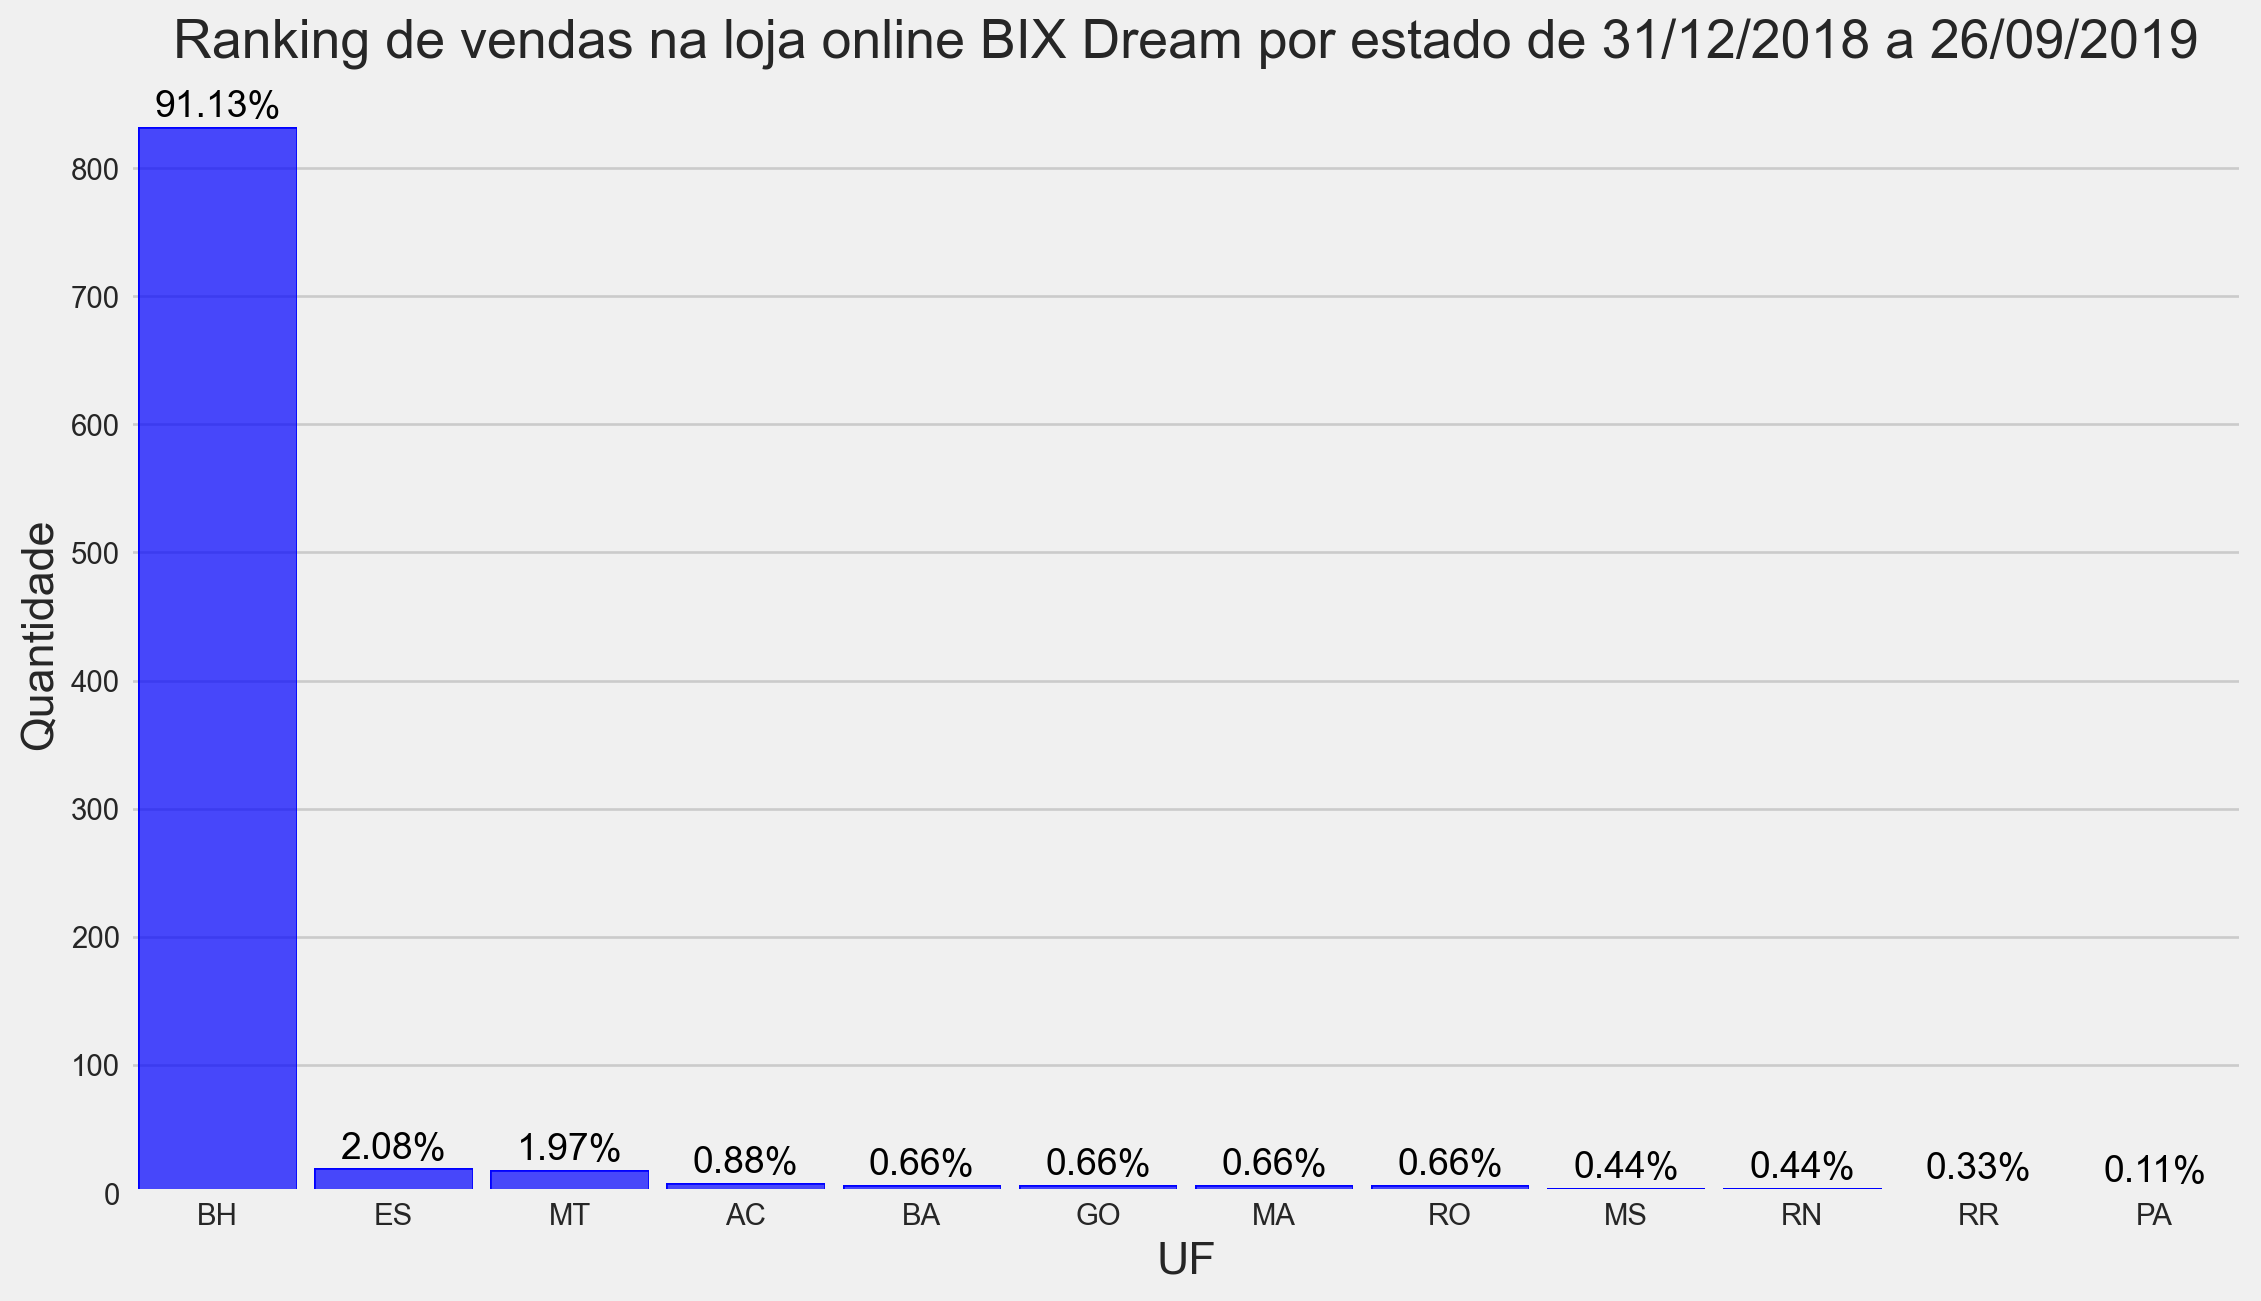

In [28]:
fig = (
    pd.DataFrame(df.query('StoreID == 22').groupby(['StoreCityName','ClientStateName'])['ClientStateName'].count())
    .rename( columns={'ClientStateName':'count'}).reset_index().sort_values(by='count', ascending=False)
    .pipe(so.Plot, x='ClientStateName', y='count', text=percent)
    .add(so.Bar(width=0.9, color='blue'))
    .label(x="UF", y="Quantidade", title='Ranking de vendas na loja online BIX Dream por estado de 31/12/2018 a 26/09/2019')
    .layout(size=(12, 7))
    .add(so.Text(valign='baseline', color="black"))
)
fig.theme({**style.library["fivethirtyeight"]})

In [29]:
print('Estatística da quantidade de produtos comprados em cada atendimento')
df['Quantity'].describe(percentiles=[.25,.50,.75,.94,.95])

Estatística da quantidade de produtos comprados em cada atendimento


count    32753.000000
mean         1.058651
std          0.239606
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
94%          1.000000
95%          2.000000
max          3.000000
Name: Quantity, dtype: float64

### Observações:
- O gênero predominante nas compras em todas as lojas é do sexo masculino, chega a ser de 5x a 8x a mais comparado a quantidade de mulheres dependendo da loja.
- A faixa etaria mais frequente dos clientes está entre 30 e 40 anos de idade, a mediana está em 38 anos de idade.
- 3 camisetas é o máximo que alguns cliente compraram de uma só vez, vemos no 'describe' que são algumas excessões para esses clientes que compram 2 camisetas ou mais, já que 94% compram apenas 1 camiseta.
- Na loja online mais de 90% do faturamento vem só de BH, os outros estados tem pouca influência no total faturado.

## seguimentação de clientes

In [30]:
df.head()

ClientID  Discount  UnitPrice  Quantity  TotalPurchase StoreID  \
PurchaseDate                                                                  
2018-12-10      14001      0.08      249.2         1          249.2       4   
2019-04-25      14001      0.10      162.4         1          162.4       4   
2019-07-17      14001      0.10      194.6         1          194.6       4   
2018-12-03      14116      0.08      249.2         1          249.2       4   
2019-05-07      14116      0.10      261.8         2          523.6       4   

                  ProductName Size ClientCityName ClientStateName DateOfBirth  \
PurchaseDate                                                                    
2018-12-10         Tempestade    G       Curitiba              PR  1985-06-28   
2019-04-25             Thanos    G       Curitiba              PR  1985-06-28   
2019-07-17    Capitão América    P       Curitiba              PR  1985-06-28   
2018-12-03         Tempestade    G       Curitiba              PR  1987-10-21   
2019-05-07            Ciclope    G       Curitiba              PR  1987-10-21   

              YearsOld    Sex StoreCityName StoreStateName  
PurchaseDate                                                
2018-12-10          33  Homem      Curitiba             PR  
2019-04-25          33  Homem      Curitiba             PR  
2019-07-17          34  Homem      Curitiba             PR  
2018-12-03          31  Homem      Curitiba             PR  
2019-05-07          31  Homem      Curitiba             PR

In [31]:
# Faz uma cópia do data frame principal
clusterizacao_df = df.copy()

# Exclui as colunas respectivas
clusterizacao_df.drop(columns=['DateOfBirth', 'StoreCityName', 'StoreStateName', 'ClientID', 'Discount', 'UnitPrice'], inplace=True)

# Transforma os dados 'string' para o tipo numérico.
clusterizacao_df[['ProductName',
     'Size',
     'ClientCityName',
     'ClientStateName',
     'Sex']] = clusterizacao_df[['ProductName',
                              'Size',
                              'ClientCityName',
                              'ClientStateName',
                              'Sex']].apply(LabelEncoder().fit_transform)

In [32]:
clusterizacao_df.head()

Quantity  TotalPurchase StoreID  ProductName  Size  \
PurchaseDate                                                       
2018-12-10           1          249.2       4           20     0   
2019-04-25           1          162.4       4           21     0   
2019-07-17           1          194.6       4            4     3   
2018-12-03           1          249.2       4           20     0   
2019-05-07           2          523.6       4            5     0   

              ClientCityName  ClientStateName  YearsOld  Sex  
PurchaseDate                                                  
2018-12-10                34               10        33    0  
2019-04-25                34               10        33    0  
2019-07-17                34               10        34    0  
2018-12-03                34               10        31    0  
2019-05-07                34               10        31    0

In [33]:
# PCA:  “um método de projeção dos dados multivariados em um espaço de dimensão menor,
# sem que as relações entre as amostras sejam afetadas” (Ferreira, 2015).
seg_clientes_pca = PCA(n_components=3).fit_transform(clusterizacao_df)
clusterizacao_df = None

In [34]:
%%time
# Treina o modelo 8x para encontrar o melhor valor de 'k'.
inertia = []
for n in range(1, 8):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(seg_clientes_pca)
    inertia.append(algorithm.inertia_)

CPU times: total: 3.06 s
Wall time: 1.1 s


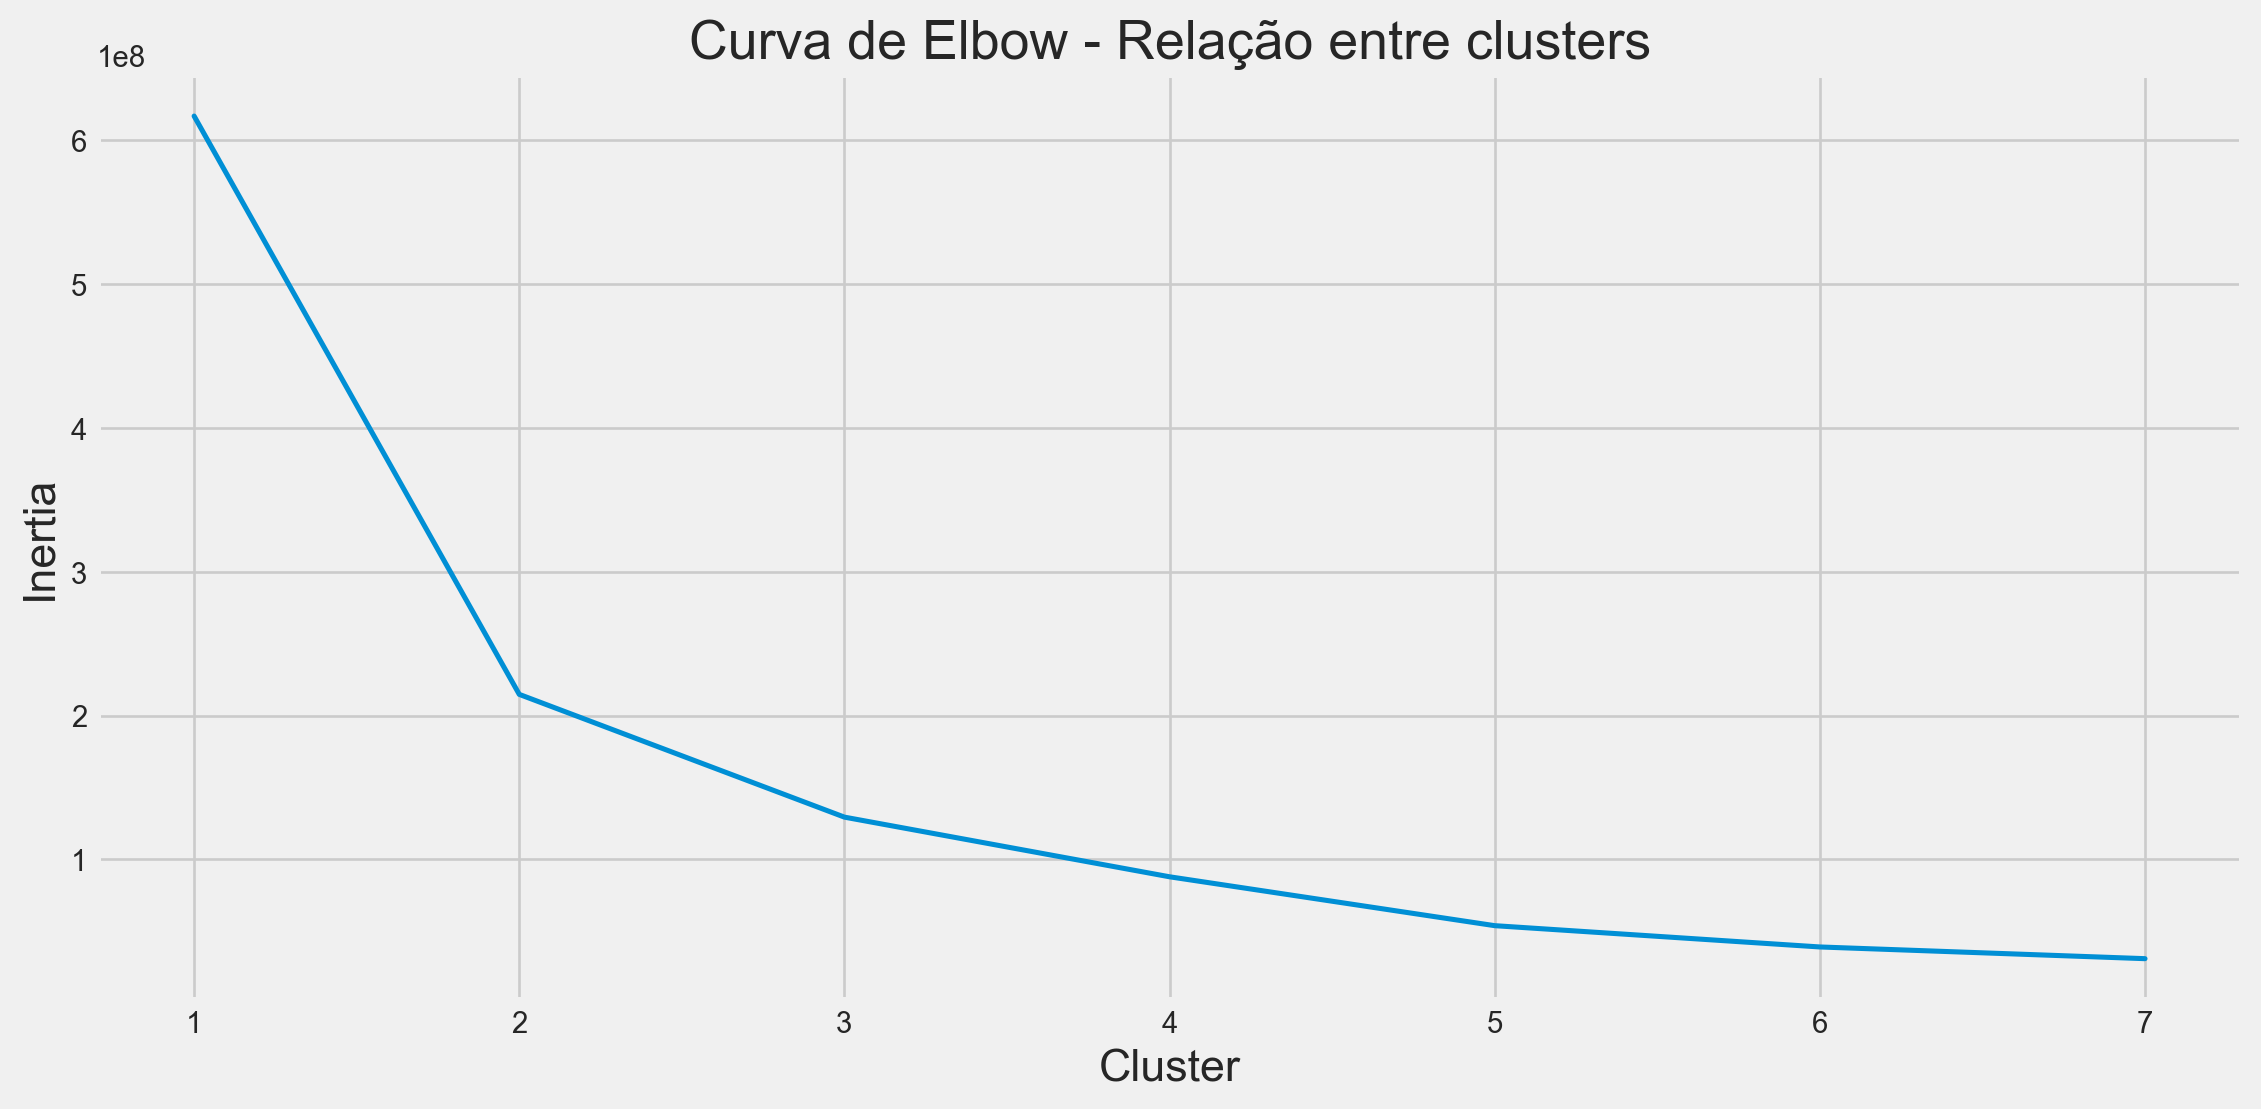

In [35]:
# Mostra graficamente a inercia da curva de acordo com o melhor resultado de cluster(k)
fig = (
    so.Plot(x=range(1, 8), y=inertia)
    .add(so.Lines(linewidth=1.9))
    .label(x='Cluster', y='Inertia', title='Curva de Elbow - Relação entre clusters')
    .layout(size=(12, 6))
)
fig.theme({**style.library["fivethirtyeight"]})

In [36]:
# Treina o modeleo preditivo com 4 clusters
modelo_v1 = KMeans(n_clusters = 4)
modelo_v1.fit(seg_clientes_pca)

KMeans(n_clusters=4)

In [37]:
# Avalia o modelo com 4 clusters, quanto mais próximo de 1.0 melhor
labels = modelo_v1.labels_
silhouette_score(seg_clientes_pca, labels, metric='euclidean')

0.4652826593374893

In [38]:
# Treina o modeleo preditivo com 5 clusters
modelo_v1 = KMeans(n_clusters=5)
modelo_v1.fit(seg_clientes_pca)

KMeans(n_clusters=5)

In [39]:
# Avalia o modelo com 5 clusters, quanto mais próximo de 1.0 melhor
labels = modelo_v1.labels_
silhouette_score(seg_clientes_pca, labels, metric='euclidean')

0.47109976420017546

In [452]:
# Treina o modeleo preditivo com 3 clusters
modelo_v1 = KMeans(n_clusters=3)
modelo_v1.fit(seg_clientes_pca)

KMeans(n_clusters=3)

In [453]:
# Avalia o modelo com 3 clusters, quanto mais próximo de 1.0 melhor
labels = modelo_v1.labels_
silhouette_score(seg_clientes_pca, labels, metric='euclidean')

0.6814277366493793

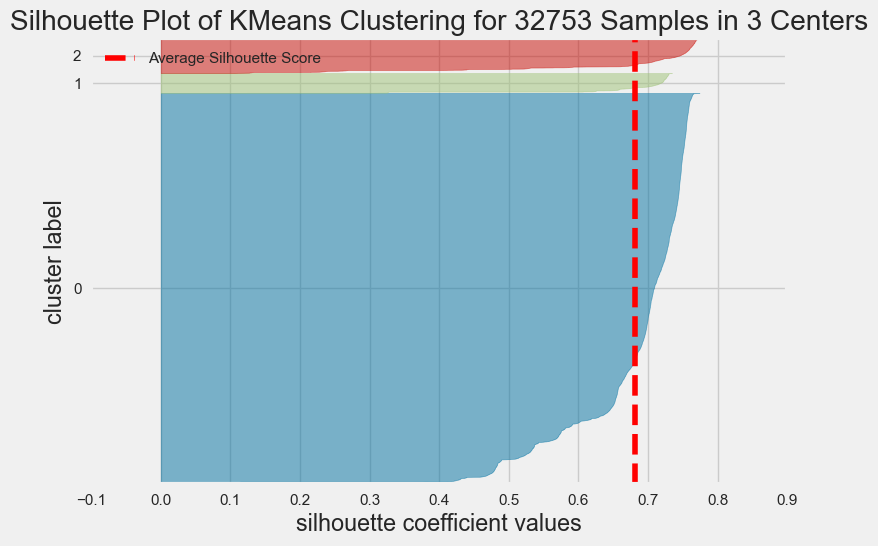

In [454]:
visualizer = SilhouetteVisualizer(modelo_v1, colors='yellowbrick')

# Fit the data to the visualizer
visualizer.fit(seg_clientes_pca)
# Finalize and render the figure
visualizer.show()

visualizer = None

In [455]:
# Adiciona a coluna de clusters para seus respectivos clientes no data frame principal
df['ClientCluster'] = modelo_v1.labels_

In [456]:
df.head()

ClientID  Discount  UnitPrice  Quantity  TotalPurchase StoreID  \
PurchaseDate                                                                  
2018-12-10      14001      0.08      249.2         1          249.2       4   
2019-04-25      14001      0.10      162.4         1          162.4       4   
2019-07-17      14001      0.10      194.6         1          194.6       4   
2018-12-03      14116      0.08      249.2         1          249.2       4   
2019-05-07      14116      0.10      261.8         2          523.6       4   

                  ProductName Size ClientCityName ClientStateName DateOfBirth  \
PurchaseDate                                                                    
2018-12-10         Tempestade    G       Curitiba              PR  1985-06-28   
2019-04-25             Thanos    G       Curitiba              PR  1985-06-28   
2019-07-17    Capitão América    P       Curitiba              PR  1985-06-28   
2018-12-03         Tempestade    G       Curitiba              PR  1987-10-21   
2019-05-07            Ciclope    G       Curitiba              PR  1987-10-21   

              YearsOld    Sex StoreCityName StoreStateName  ClientCluster  
PurchaseDate                                                               
2018-12-10          33  Homem      Curitiba             PR              0  
2019-04-25          33  Homem      Curitiba             PR              0  
2019-07-17          34  Homem      Curitiba             PR              0  
2018-12-03          31  Homem      Curitiba             PR              0  
2019-05-07          31  Homem      Curitiba             PR              2

In [457]:
# Retorna a quantidade de compras distinstas que cada cliente tem
(pd.DataFrame(df.groupby(['ClientCluster', 'ClientID'])['ClientID'].count())
.rename(columns={'ClientID':'count'})
.reset_index()
.sort_values(by='count', ascending=False))

ClientCluster  ClientID  count
4828               0     19089      8
7421               0     22056      8
1430               0     15499      8
1439               0     15509      8
10924              0     26177      7
...              ...       ...    ...
10678              0     25879      1
10676              0     25877      1
10675              0     25876      1
2755               0     16895      1
16802              2     28694      1

[16803 rows x 3 columns]

In [458]:
# Retorna a quantidade de compras distinstas que cada cliente tem
b = pd.DataFrame(df.groupby(['ClientCluster', 'ClientID'])['ClientID'].size())
b.columns = range(b.columns.size)
b.reset_index(inplace=True)
b.sort_values(by=[0], ascending=False)

ClientCluster  ClientID  0
4828               0     19089  8
7421               0     22056  8
1430               0     15499  8
1439               0     15509  8
10924              0     26177  7
...              ...       ... ..
10678              0     25879  1
10676              0     25877  1
10675              0     25876  1
2755               0     16895  1
16802              2     28694  1

[16803 rows x 3 columns]

In [459]:
# Aqui eu vejo se as compras são no mesmo dia ou não, veja as observações contem apenas um produto, e se o cliente levar dois
# produtos no mesmo dia? teram duas linhas com datas iguais, e a intenção é saber a quantidade de clientes que voltam outro dia
# para novas compras. Mas e se o cliente tem compras na mesma data, o que impediria dele(a) ter comprado um produto de manhã
# e outro de tarde por exemplo? não seriam compras distintas? o cliente voltou a loja e isso é o mais importante.
df.query('ClientID == 19089')

ClientID  Discount  UnitPrice  Quantity  TotalPurchase StoreID  \
PurchaseDate                                                                  
2018-07-14      19089      0.10      249.2         1          249.2       7   
2018-04-07      19089      0.10      162.4         1          162.4       7   
2018-06-07      19089      0.08      406.0         1          406.0       7   
2018-11-26      19089      0.10      261.8         1          261.8       7   
2018-11-05      19089      0.10      148.4         1          148.4       7   
2018-05-23      19089      0.10      204.4         1          204.4       7   
2018-05-09      19089      0.10      162.4         1          162.4       7   
2018-12-23      19089      0.08      233.8         1          233.8       7   
2019-03-31      19089      0.10      204.4         1          204.4       7   

                   ProductName Size ClientCityName ClientStateName  \
PurchaseDate                                                         
2018-07-14          Tempestade    G      São Paulo              SP   
2018-04-07              Thanos    G      São Paulo              SP   
2018-06-07              Naruto    G      São Paulo              SP   
2018-11-26             Ciclope    G      São Paulo              SP   
2018-11-05    Mulher-Maravilha    G      São Paulo              SP   
2018-05-23               Flash    G      São Paulo              SP   
2018-05-09              Thanos    M      São Paulo              SP   
2018-12-23              Batman    P      São Paulo              SP   
2019-03-31               Flash    M      São Paulo              SP   

             DateOfBirth  YearsOld    Sex StoreCityName StoreStateName  \
PurchaseDate                                                             
2018-07-14    1986-11-21        31  Homem     São Paulo             SP   
2018-04-07    1986-11-21        31  Homem     São Paulo             SP   
2018-06-07    1986-11-21        31  Homem     São Paulo             SP   
2018-11-26    1986-11-21        32  Homem     São Paulo             SP   
2018-11-05    1986-11-21        31  Homem     São Paulo             SP   
2018-05-23    1986-11-21        31  Homem     São Paulo             SP   
2018-05-09    1986-11-21        31  Homem     São Paulo             SP   
2018-12-23    1986-11-21        32  Homem     São Paulo             SP   
2019-03-31    1986-11-21        32  Homem     São Paulo             SP   

              ClientCluster  
PurchaseDate                 
2018-07-14                0  
2018-04-07                0  
2018-06-07                2  
2018-11-26                0  
2018-11-05                0  
2018-05-23                0  
2018-05-09                0  
2018-12-23                0  
2019-03-31                0

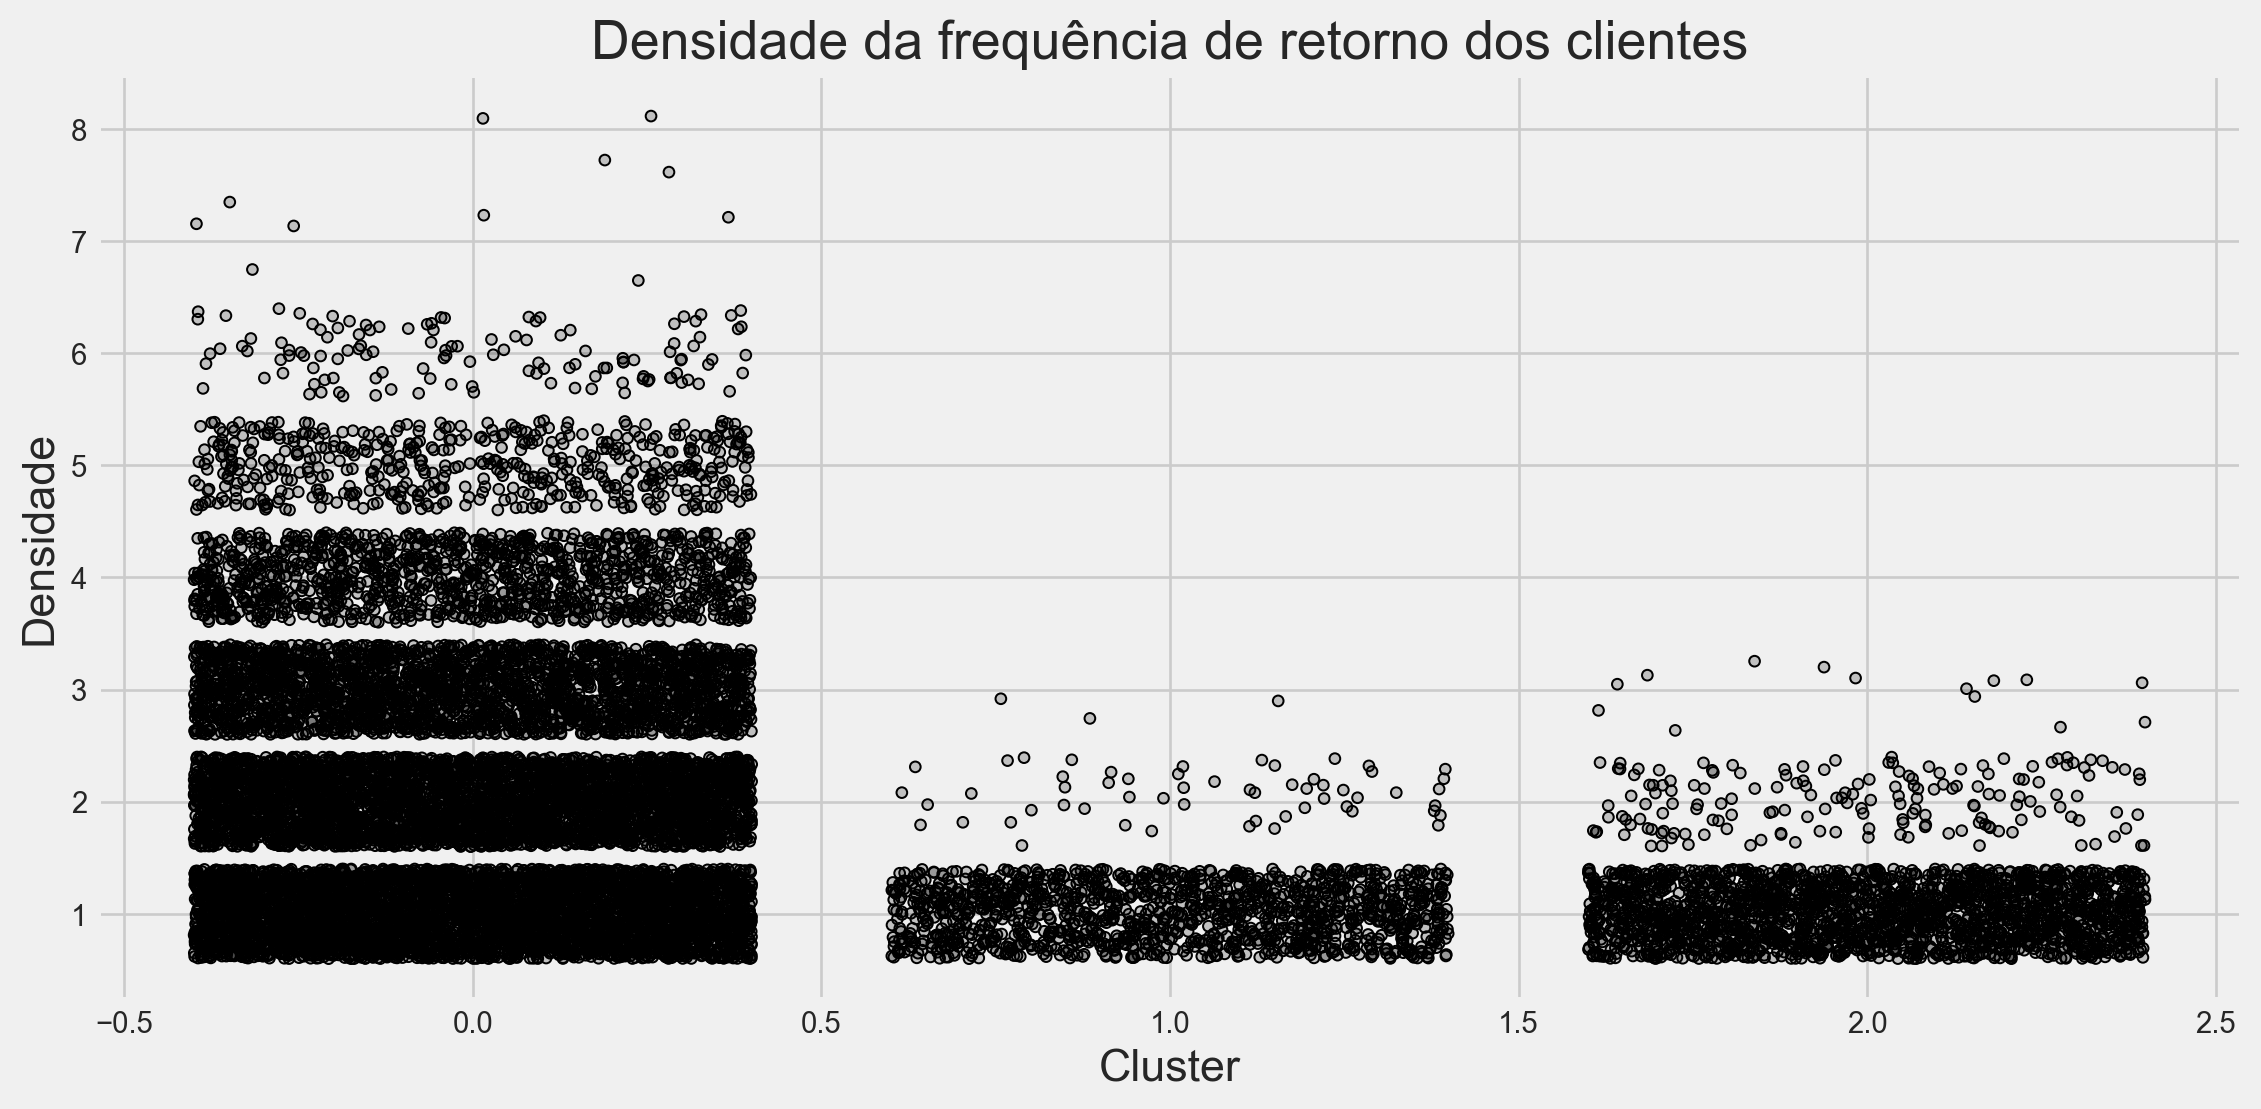

In [460]:
fig = (pd.DataFrame(df.groupby(['ClientCluster', 'ClientID'])['ClientID'].count())
    .rename(columns={'ClientID':'count'}).reset_index().sort_values(by='count', ascending=False)
    .pipe(so.Plot, x='ClientCluster', y='count')
    .add(so.Dots(color="black"), so.Jitter(x=0.8, y=0.8))
    .label(x='Cluster', y='Densidade', title='Densidade da frequência de retorno dos clientes')
    .layout(size=(12, 6))
)
fig.theme({**style.library["fivethirtyeight"]})

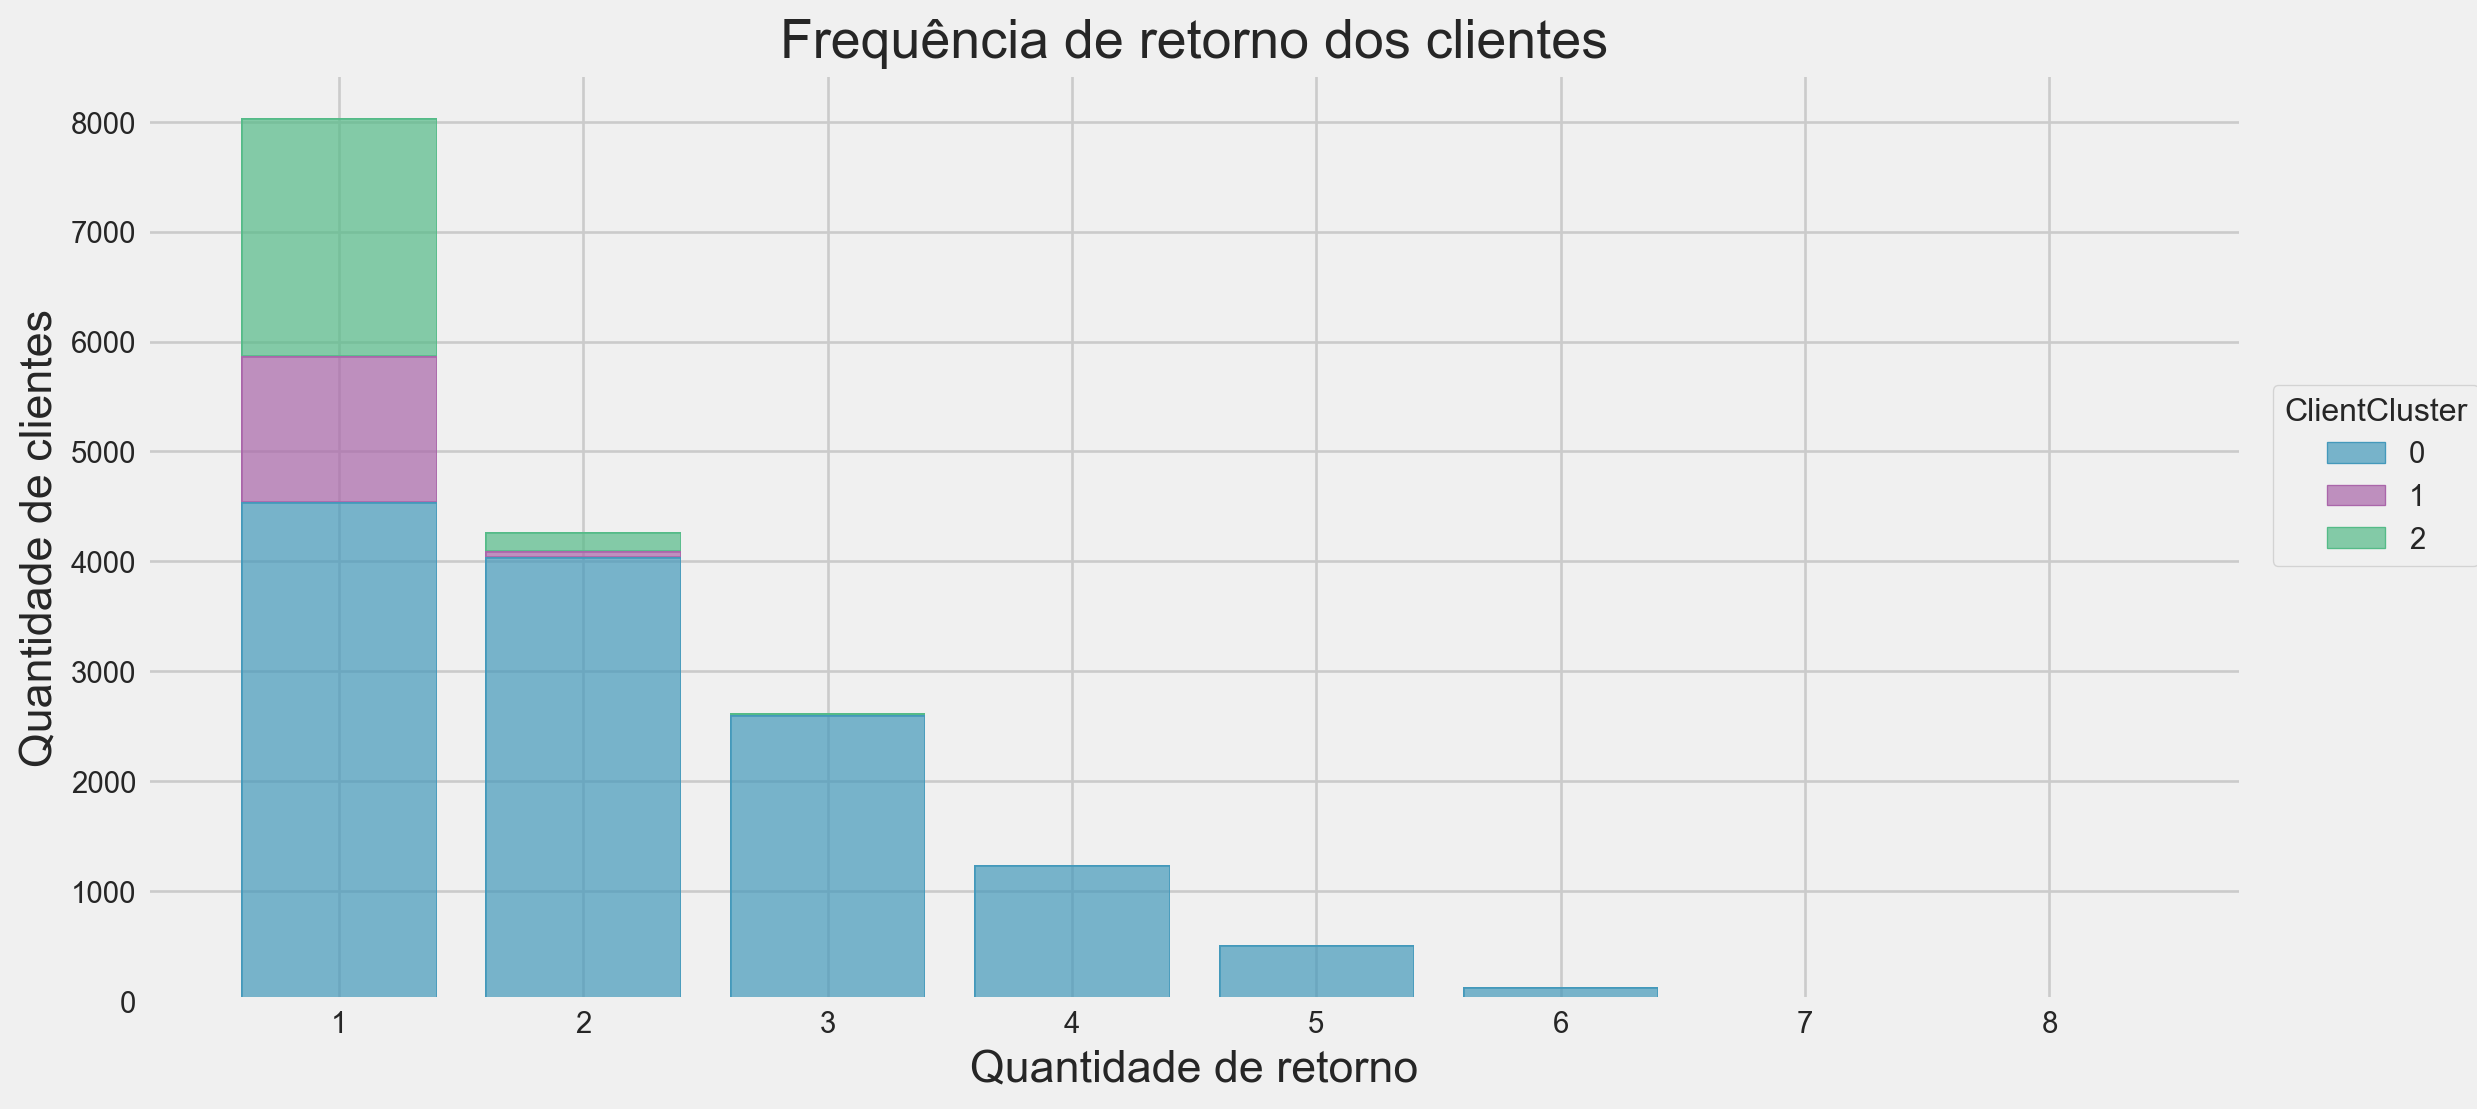

In [461]:
fig = (pd.DataFrame(df.groupby(['ClientCluster', 'ClientID'])['ClientID'].count())
    .rename(columns={'ClientID':'count'}).reset_index().sort_values(by='count', ascending=False)
    .pipe(so.Plot, x='count', color='ClientCluster')
    .add(so.Bar(), so.Count(), so.Stack())
    .label(x='Quantidade de retorno', y='Quantidade de clientes', title='Frequência de retorno dos clientes')
    .layout(size=(12, 6))
    .scale(color=["#49b", "#a6a", "#5b8"])
)
fig.theme({**style.library["fivethirtyeight"]})

In [462]:
# Um novo dataframe com a quantidade de pessoas e suas frequências de retorno as compras
c = pd.DataFrame(b.groupby(['ClientCluster', 0 ])[0].size())
c.columns = ['a']
c.reset_index(inplace=True)
c.columns = ['A', 'B', 'C']

# Seleciona a quantidade de pessoas que retornam 1 e 2 vezes em cada cluster e retorna a porcentagem
# dos clientes que retornam a comprar na loja uma segunda vez.
for cluster in range(0,3):
    selcao = c.query(f'A == {cluster} & B == [1, 2]').min() / c.query(f'A == {cluster} & B == [1, 2]').max() * 100
    print(f'Cluster {cluster}: {selcao["C"].round(2)}% dos clientes voltam a comprar ao menos uma segunda vez.')

b, c = None, None

Cluster 0: 88.92% dos clientes voltam a comprar ao menos uma segunda vez.
Cluster 1: 4.28% dos clientes voltam a comprar ao menos uma segunda vez.
Cluster 2: 7.8% dos clientes voltam a comprar ao menos uma segunda vez.


In [463]:
# Agrupa por cluster e retorna as estatísticas de gasto para cada cluster
df.groupby('ClientCluster')[['TotalPurchase']].describe()

TotalPurchase                                               \
                      count        mean         std    min    25%    50%   
ClientCluster                                                              
0                   28751.0  193.757497   43.440169  114.8  156.8  201.6   
1                    1456.0  729.721154  156.054358  583.8  686.0  686.0   
2                    2546.0  414.649647   44.807160  313.6  406.0  406.0   

                              
                 75%     max  
ClientCluster                 
0              226.8   296.8  
1              686.0  1372.0  
2              428.4   523.6

In [464]:
# Query para retornar a porcentagem de clientes em cada estado que compra na loja online
percent = []
for c in df["ClientCluster"].unique():
    loop = round(df.query("ClientCluster == @c")['TotalPurchase'].sum() /
           df['TotalPurchase'].sum() * 100, 2)
    percent.append(f"{loop}%")
# Ordena a lista do maior para o menor
percent.sort(reverse=True)

In [465]:
percent

['72.45%', '13.82%', '13.73%']

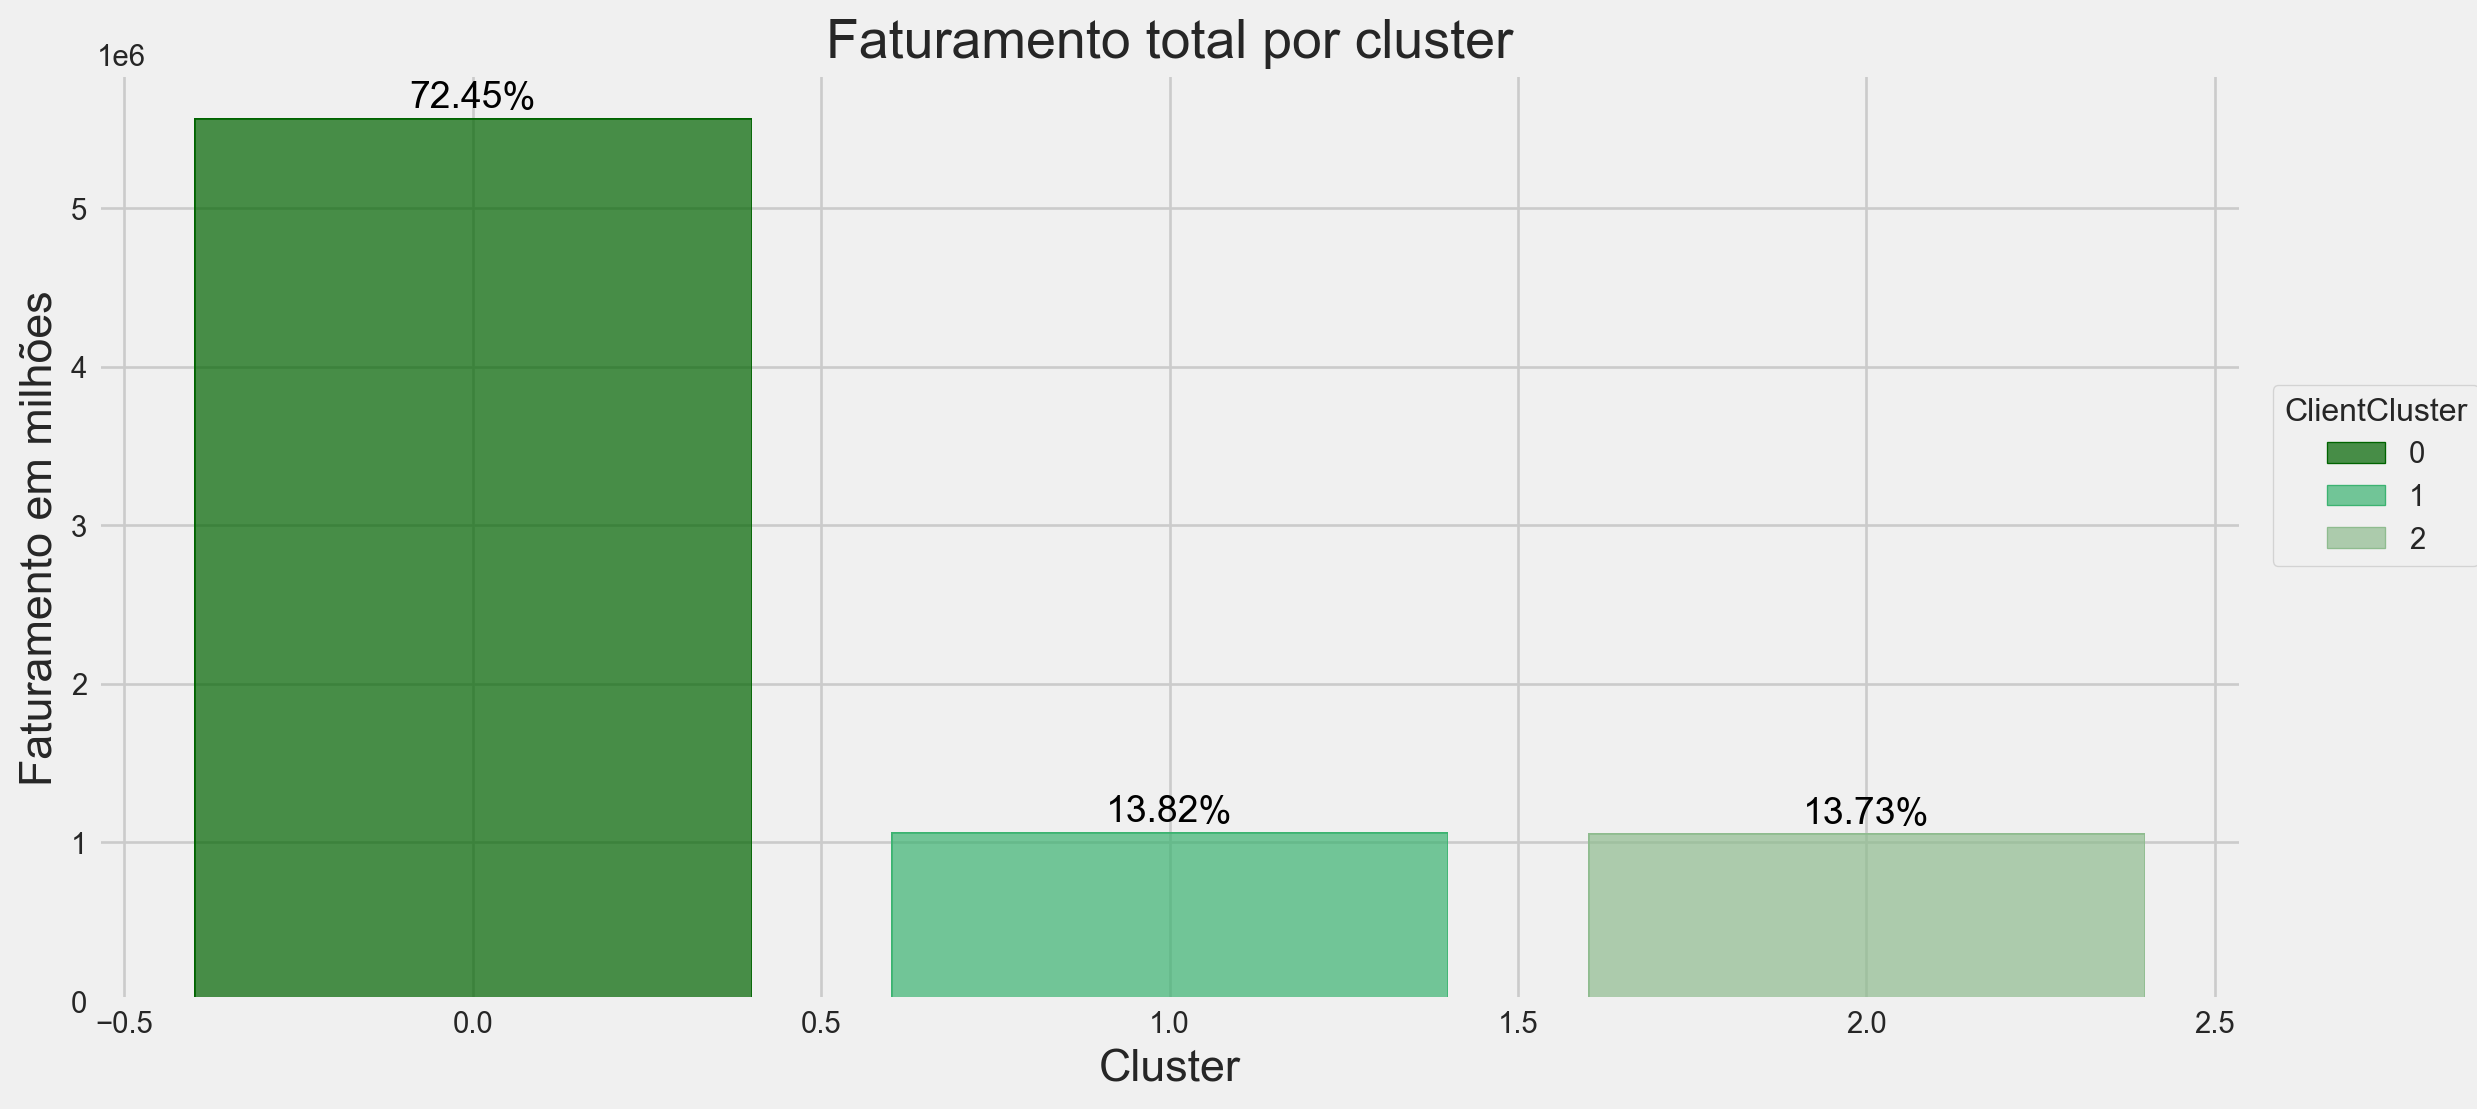

In [466]:
fig = (pd.DataFrame(df.groupby('ClientCluster')['TotalPurchase'].sum())
    .reset_index().sort_values(by='TotalPurchase', ascending=False)
    .pipe(so.Plot, x='ClientCluster', y='TotalPurchase', color='ClientCluster', text=percent)
    .add(so.Bar())
    .label(x='Cluster', y='Faturamento em milhões', title='Faturamento total por cluster')
    .layout(size=(12, 6))
    .scale(color=["#006400", "#3CB371", "#8FBC8F"])
    .add(so.Text(valign='baseline', color="black"))
)
fig.theme({**style.library["fivethirtyeight"]})

### Observações:
##### Cluster 0:
- O cluster 0 mostra os clientes que normalmente "compram pouco", são 28751 observações, em cada compra gastam no mínimo 115 reais, e no máximo 297 reais, a média de gasto em cada compra é 194 reais, o cluster 0 também tem a maior quantidade de clientes que voltam a comprar na loja, cerca de 88,92% dos clientes compram 2x ou mais.
    - Apesar do cluster 0 ter os clientes que gastam menos em cada loja, é o cluster que tem os clientes mais "fidelizados" das lojas em comparação com os outros clusters.
    
##### Cluster 1:
- O cluster 1 mostra os clientes com mais "poder de compra", são 1456 observações, em cada compra gastam no mínimo 584 reais, e no máximo 1372 reais, a média de gasto em cada compra é 730 reais, apenas 4,28% dos clientes desse cluster voltam a comprar uma segunda vez ou mais na loja.

##### Cluster 2:
- O cluster 2 corresponde aos "clientes médio", são 2546 observações, em cada compra gastam no mínimo 314 reais, e no máximo 524 reais, a média de gasto em cada compra é 415 reais, o histograma mostra que apenas 7,80% dos clientes voltam a comprar uma segunda vez ou mais na loja.

##### Impacto do faturamento entre clusters
- O cluster 0 representa aproximadamente 72% do faturamento total da rede de lojas, os clusters 1 e 2 ambos seguem com 13% cada.

##### Definições e estratégias com a seguimentação
- O conceito de segmentação de clientes é definido como uma divisão de pessoas com características similares. Como segmentação, entendemos que é necessário traçar um perfil do consumidor para conseguir encontrá-lo e se relacionar com ele. Afinal, é a partir dela que é possível ter um norte na hora de encontrar clientes em potencial e, assim, conseguir encontrar a persona para o negócio.
    - Criar uma estratégia de comunicação direcionada;
    - Identificar o melhor canal de comunicação entre marca e consumidor, como e-mail, chatbot, SMS, redes sociais, etc.;
    - Encontrar maneiras de melhorar produtos e serviços;
    - Melhorar o relacionamento com o cliente;
    - Concentrar esforços nas pessoas certas;
    - Aprimorar as estratégias de atendimento.
- REF: Com autor: Zenvia. Segmentação de clientes: o que é, benefícios e como fazer. Zenvia, 2019. <encurtador.com.br/pAJO5>. Acesso em: 24 de dezembro de 2022. 

# Análise de série temporal

In [288]:
# PREPARANDO OS DADOS

# Agrupa os dados por data e dia, e atribui o total de venda do dia
previsao_df = pd.DataFrame(df['TotalPurchase'].resample('W').sum())

# Reseta o indice, já que o dataframe retornou dois indices
#previsao_df.reset_index(inplace=True)

In [159]:
previsao_df

TotalPurchase
PurchaseDate               
2018-03-04          30095.8
2018-03-11          65382.8
2018-03-18          65678.2
2018-03-25          66360.0
2018-04-01          56141.4
...                     ...
2020-01-05          75159.0
2020-01-12          50369.2
2020-01-19          40259.8
2020-01-26          26363.4
2020-02-02          19026.0

[101 rows x 1 columns]

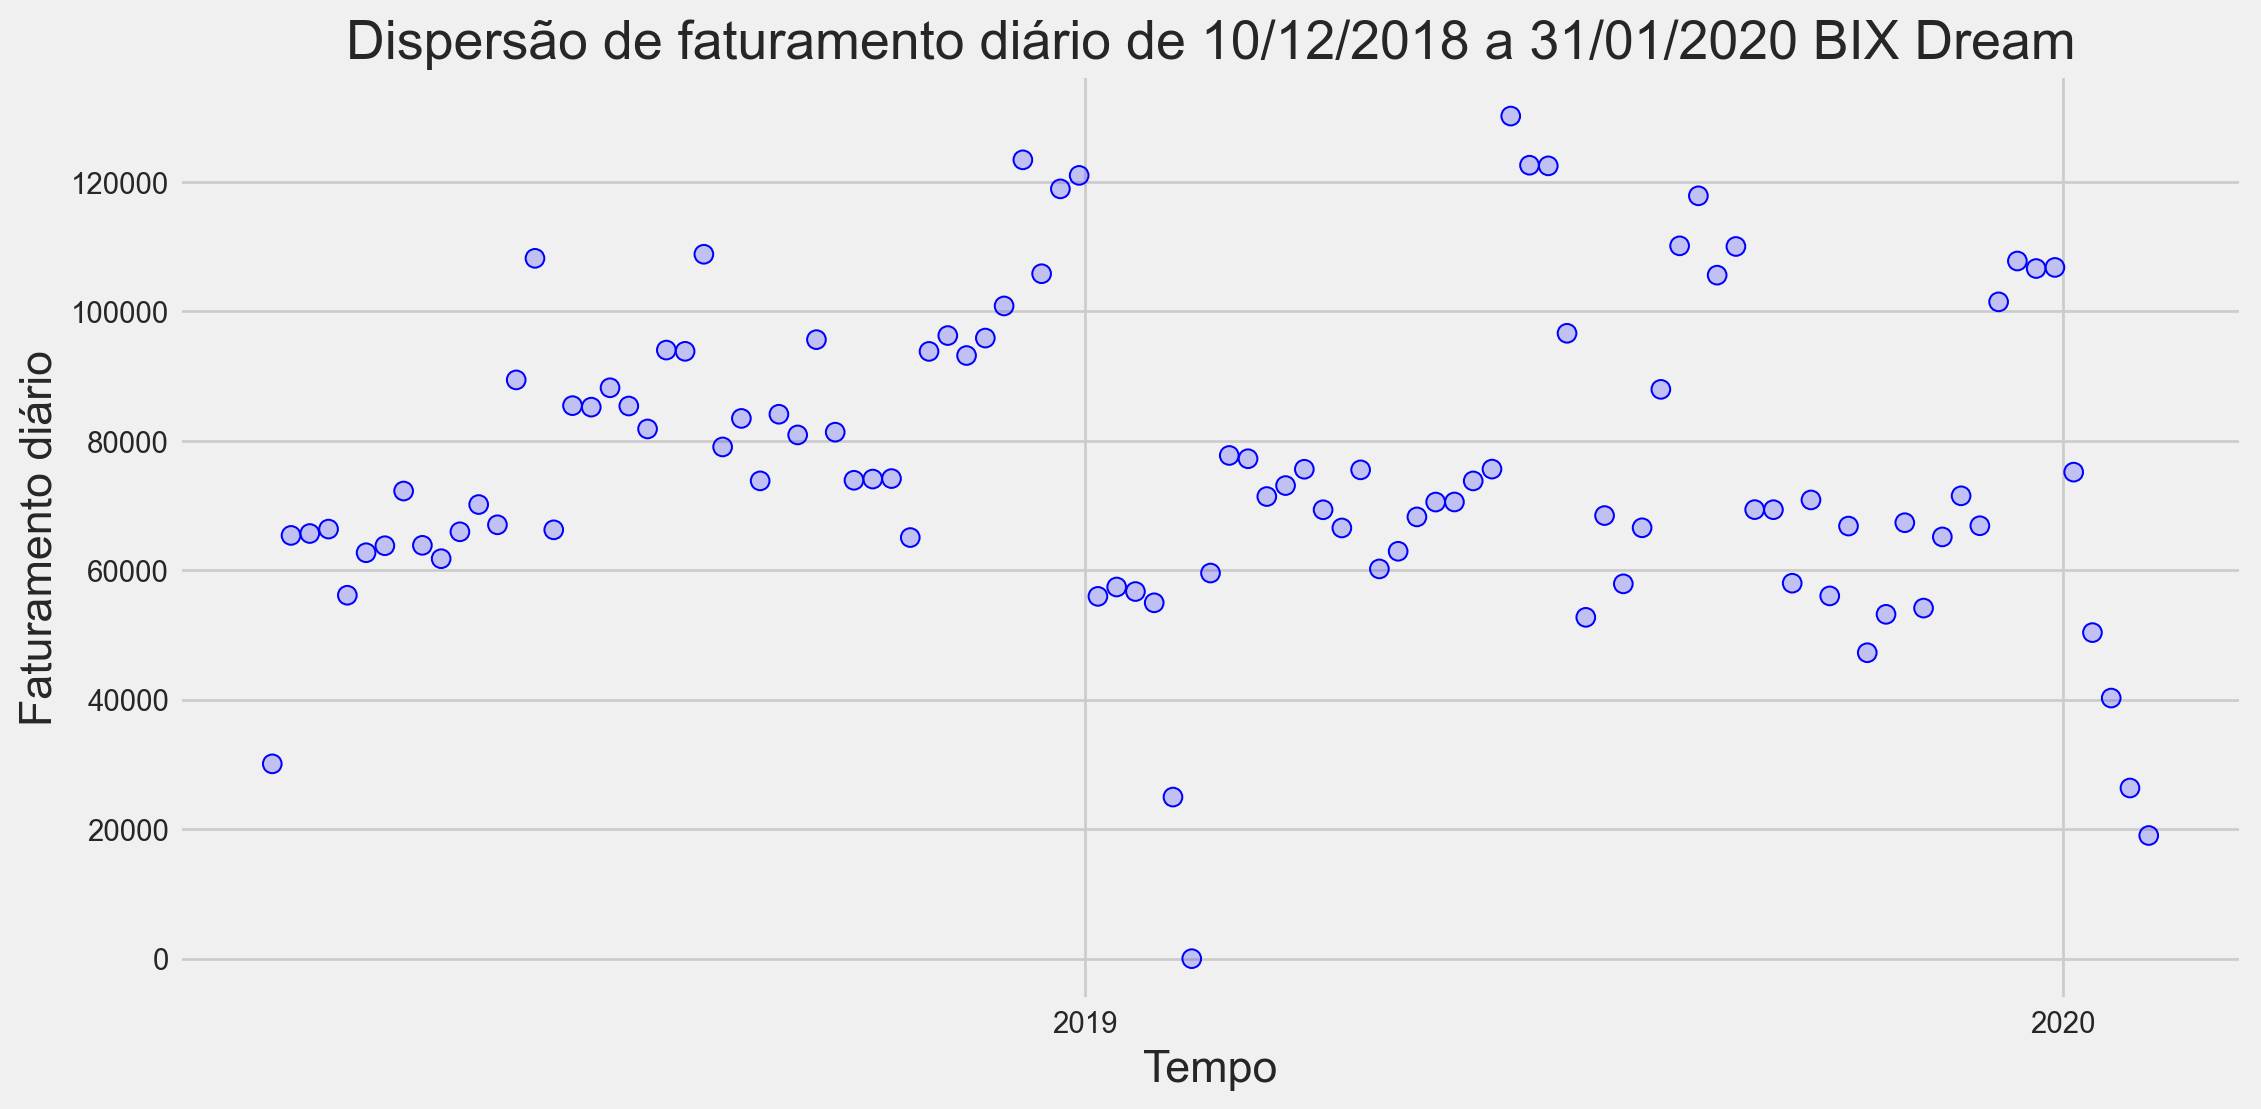

In [149]:
fig = (
    so.Plot(x=previsao_df.index, y=previsao_df['TotalPurchase'])
    .add(so.Dots(color="blue", fill=True, pointsize=7))
    .label(x='Tempo', y='Faturamento diário', title='Dispersão de faturamento diário de 10/12/2018 a 31/01/2020 BIX Dream')
    .layout(size=(12, 6))
)
fig.theme({**style.library["fivethirtyeight"]})

<AxesSubplot: >

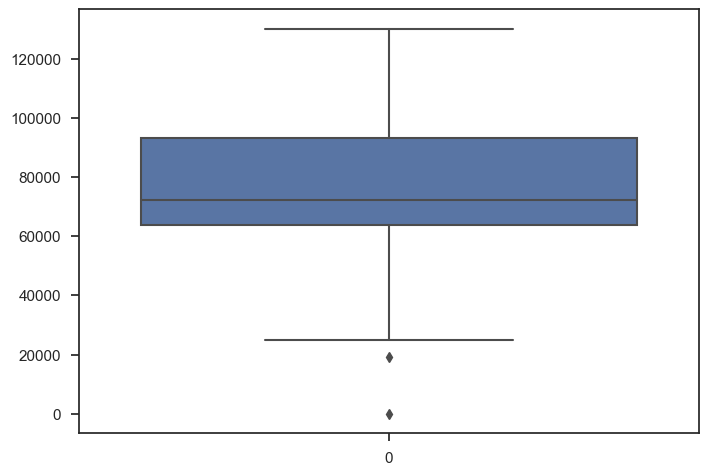

In [150]:
sns.set_theme(style="ticks")
sns.boxplot(previsao_df['TotalPurchase'])

<AxesSubplot: xlabel='TotalPurchase', ylabel='Count'>

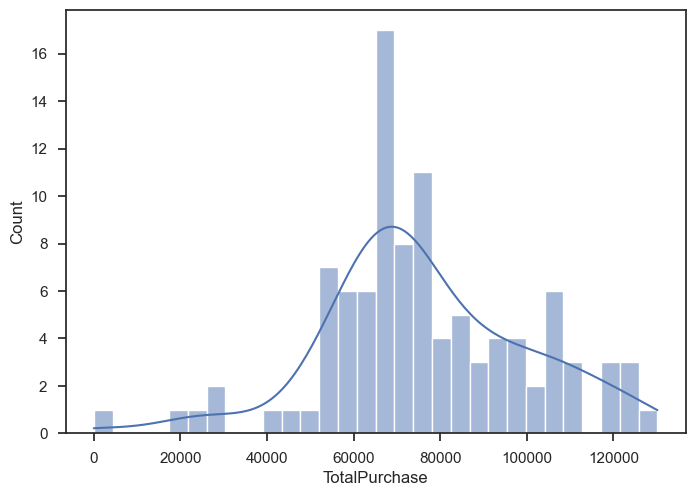

In [151]:
sns.histplot(previsao_df['TotalPurchase'], kde=True, bins=30)

In [152]:
Q1, Q3 = np.percentile(previsao_df['TotalPurchase'], [25, 75])
print(f'''25% dos dos dados estão abaixo de {Q1}
75% dos dados estão abaixo de {Q3}''')

25% dos dos dados estão abaixo de 63852.6
75% dos dados estão abaixo de 93172.8


In [153]:
amplitude_interpercentil = Q3 - Q1
amplitude_interpercentil

29320.200000000004

In [154]:
limite_inf = Q1 - (1.5 * amplitude_interpercentil)
limite_sup = Q3 + (1.5 * amplitude_interpercentil)
print(f'''Limite inferior: {limite_inf:.2f}
Limite superior: {limite_sup:.2f}''')

Limite inferior: 19872.30
Limite superior: 137153.10


Os valores que estiverem ABAIXO do LIMITE INFERIOR ou ACIMA do LIMITE SUPERIOR, podem ser CONSIDERADOS outliers,
cabe tratamento a esses dados caso realmente os dados sejam acusados de outliers,
podemos simplismente excluir os valores, subistiruir pela media, media entre valores anteriores ao indice

In [155]:
outliers_sup = previsao_df[previsao_df['TotalPurchase'] > limite_sup]
outliers_sup

Empty DataFrame
Columns: [TotalPurchase]
Index: []

In [156]:
outliers_inf = previsao_df[previsao_df['TotalPurchase'] < limite_inf]
outliers_inf

TotalPurchase
PurchaseDate               
2019-02-10              0.0
2020-02-02          19026.0

- Observamos uma sequência de 12 dias sem vendas, algo aconteceu, poderia ser recesso de férias em fevereiro?
- Não temos os dados de fevereiro de 2018 ou 2020 para comparar se é um acontecimento comum nessa época do ano, temos um indicativo de que acontecerá novamente esse período sem vendas em fevereiro de 2020 por conta do padrão de forte queda no início do ano, se bem que isso é comum para muitos estabelecimentos, isso não muda nada é apenas uma observação.


- Durante os testes de previsão de vendas, os outliers identificados nos trouxeram uma diferença significativa nas avaliações sem eles no conjunto de dados, por isso optei por remove-los.

In [297]:
previsao_df = previsao_df.query("TotalPurchase > @limite_inf")

In [179]:
previsao_df.describe()

TotalPurchase
count      99.000000
mean    77473.412121
std     21815.817477
min     24963.400000
25%     65102.800000
50%     73085.600000
75%     93490.600000
max    130163.600000

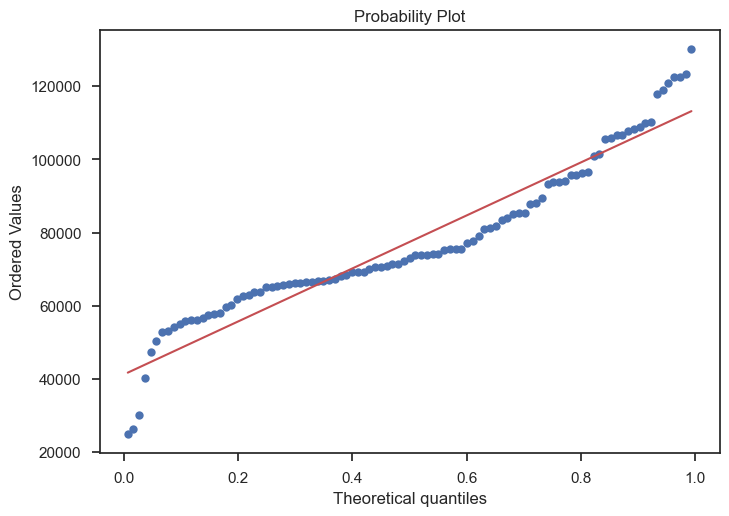

In [180]:
import scipy.stats as stats
data = previsao_df['TotalPurchase']
stats.probplot(data, dist=stats.uniform, plot=plt)
plt.show()

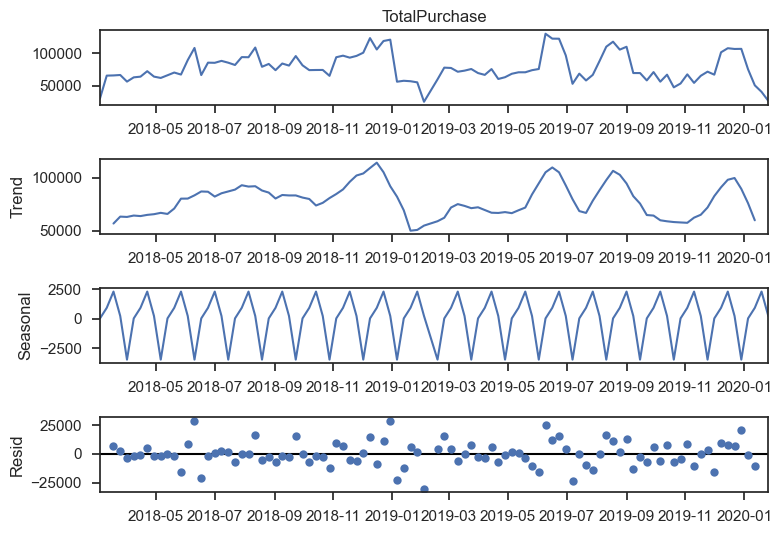

In [197]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(previsao_df['TotalPurchase'], period=5, model='additive')
resultado.plot()
plt.show()

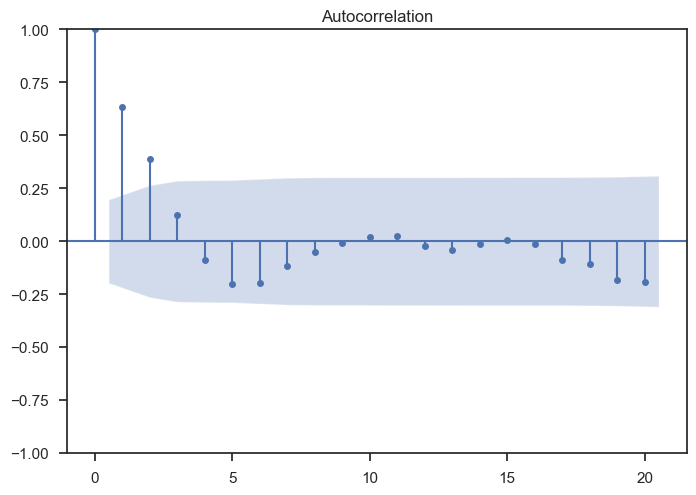

In [182]:
plot_acf(previsao_df['TotalPurchase'])
plt.show()

In [184]:
from scipy.stats import shapiro
import pymannkendall as mk
from statsmodels.tsa.stattools import adfuller

# o teste de Shapiro-Wilk atesta se a serie é gaussiana ou não (normal ou não)
# se p-valor > 0.05 assumimos que os dados são normalmente distribuídos.
print('Teste de normalidade Shapiro-Wilk')
stat, p = shapiro(previsao_df['TotalPurchase'])
print(f'    Statistics: {stat:.3f}, p-valor: {p:.3f}')
if p < 0.05:
    print('    Os dados NÃO seguem uma distruibuição Gaussiana \n')
else:
    print('    Os dados seguem um distribuição Gaussiana \n')
    
    
# Teste de MANN-KENDALL para verificar se existe uma tendência de alta ou baixa nos dados
# Se p-valor > 0.05, significa que existe uma tendência significativa.
print('Teste de tendência MANN-KENDALL')
mk = mk.original_test(previsao_df['TotalPurchase'])
print(f'    trend: {mk[0]}, p-valor: {mk[3]} \n')

# O teste Dickey-Fuller atesta a estacionaridade dos dados,,
# se p-valor > 0.05 podemos aceitar a hipótese nula, e tomar que a série é não-estacionária.
print('Teste de estacionaridade Dickey-Fuller')
fuller = adfuller(previsao_df['TotalPurchase'])
print(f'    Statistics: {fuller[0]:.3f}\n    p-valor: {fuller[1]:.3f}\n    {fuller}')
if fuller[1] > 0.05:
    print('    Os dados seguem uma série estacionária')
else:
    print('    Os dados Não seguem uma série estacionária')

Teste de normalidade Shapiro-Wilk
    Statistics: 0.965, p-valor: 0.010
    Os dados NÃO seguem uma distruibuição Gaussiana 

Teste de tendência MANN-KENDALL
    trend: no trend, p-valor: -0.35672997693912295 

Teste de estacionaridade Dickey-Fuller
    Statistics: -4.658
    p-valor: 0.000
    (-4.658132054500925, 0.0001007885709728647, 3, 95, {'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}, 1915.8046124069997)
    Os dados Não seguem uma série estacionária


In [185]:
from pmdarima.arima import ADFTest
adf_teste = ADFTest(alpha=0.05)
adf_teste.should_diff(previsao_df)

(0.01, False)

 ##### Observações:
 - Os dados não são normalmente distribuídos, p-valor é menor do que 0.05.
 - Os dados não seguem uma tendência no decorrer do tempo, o p-valor é menor do que 0.05.
 - Os dados NÃO seguem uma série estacionária, devemos fazer uma diferenciação nos dados para torna-lo estacionário

# ARIMA

Auto-Regressivo (p) -> Número de termos autorregressivos.

Integrado (d) -> Número de diferenças não sazonais necessárias para a estacionariedade.

Média Móvel (q) -> Número de erros de previsão defasados na equação de previsão.

In [186]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [298]:
size = 28
train = previsao_df[:-size]
teste = previsao_df[-size:]

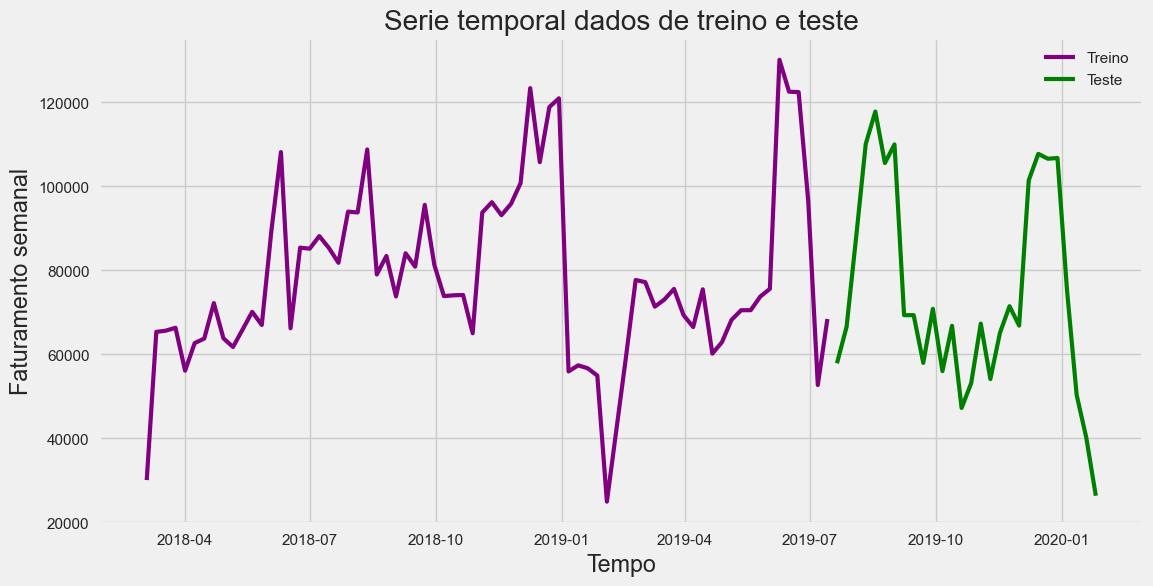

In [325]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax = sns.lineplot(x = train.index, y = train['TotalPurchase'], color = 'purple', label='Treino', lw=3)
ax = sns.lineplot(x = teste.index, y = teste['TotalPurchase'], color = 'green',label='Teste', lw=3)
ax.set_xlabel('Tempo')
ax.set_ylabel('Faturamento semanal')
ax.set_title('Serie temporal dados de treino e teste')
fig.set_size_inches(12,6)

In [300]:
%%time
arima_model = auto_arima(train, start_p=0, d=2, start_q=0, max_p=5, max_q=5,
                         start_P=0, D=1, start_Q=0, max_P=5, max_Q=5, m=12,
                         seasonal=True, error_action='warn', trace=True, suppress_warnings=True,
                         stepwise=True, random_state=20, n_fits=1000)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1373.487, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1339.260, Time=0.13 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=1310.839, Time=0.27 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=1311.154, Time=0.23 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=1313.467, Time=0.15 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=1312.907, Time=0.57 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=1349.067, Time=0.12 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=1311.525, Time=0.42 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=1313.257, Time=0.42 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=1333.932, Time=0.26 sec
 ARIMA(1,2,2)(0,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(0,2,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.85 sec

Best model:  ARIMA(0,2,1)(0,1,1)[12]  

In [301]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   71
Model:             SARIMAX(0, 2, 1)x(0, 1, 1, 12)   Log Likelihood                -652.419
Date:                            Sun, 22 Jan 2023   AIC                           1310.839
Time:                                    13:32:14   BIC                           1316.968
Sample:                                         0   HQIC                          1313.221
                                             - 71                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9588      0.318     -3.014      0.003      -1.582      -0.335
ma.S.L12      -0.6924      0.489     -1.415      0.157      -1.651       0.266
sigma2      7.905e+08   2.16e-10   3.66e+18      0.000     7.9e+08     7.9e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.79   Jarque-Bera (JB):                 7.29
Prob(Q):                              0.10   Prob(JB):                         0.03
Heteroskedasticity (H):               1.28   Skew:                            -0.43
Prob(H) (two-sided):                  0.60   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.33e+34. Standard errors may be unstable.
"""

In [302]:
arima_fit = arima_model.fit(train)

In [303]:
prediction = arima_fit.predict(n_periods=28)
prediction = pd.DataFrame(prediction.values, index=teste.index)
prediction

0
PurchaseDate               
2019-07-21     74510.578161
2019-07-28     67583.689315
2019-08-04     79174.814198
2019-08-11     83209.701180
2019-08-18     81755.477758
2019-08-25     84233.501291
2019-09-01    100098.703586
2019-09-08     98179.182320
2019-09-15     95747.421991
2019-09-22     75385.724010
2019-09-29     63890.383404
2019-10-06     63737.055810
2019-10-13     69495.375086
2019-10-20     62266.427354
2019-10-27     73555.493351
2019-11-03     77288.321447
2019-11-10     75532.039140
2019-11-17     77708.003787
2019-11-24     93271.147196
2019-12-01     91049.567044
2019-12-08     88315.747829
2019-12-15     67651.990963
2019-12-22     55854.591472
2019-12-29     55399.204992
2020-01-05     60855.465382
2020-01-12     53324.458764
2020-01-19     64311.465875
2020-01-26     67742.235086

In [260]:
def timeseries_evaluation_metrics1(y_true, y_pred):
    print(f'''
    MSE: {np.round(mean_squared_error(y_true, y_pred), 2)}
    MAE: {np.round(mean_absolute_error(y_true, y_pred), 2)}
    RMSE: {np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)}
    RMSLE: {np.round(np.sqrt(mean_squared_log_error( np.absolute(y_true), np.absolute(y_pred))), 2)}
    MAPE: {np.round(mean_absolute_percentage_error(y_true, y_pred) * 100, 2)}%
    R2: {np.round(r2_score(y_true, y_pred), 2)}''')

In [304]:
timeseries_evaluation_metrics1(teste['TotalPurchase'], prediction[0])


    MSE: 599736279.77
    MAE: 20495.45
    RMSE: 24489.51
    RMSLE: 0.35
    MAPE: 30.69%
    R2: -0.02


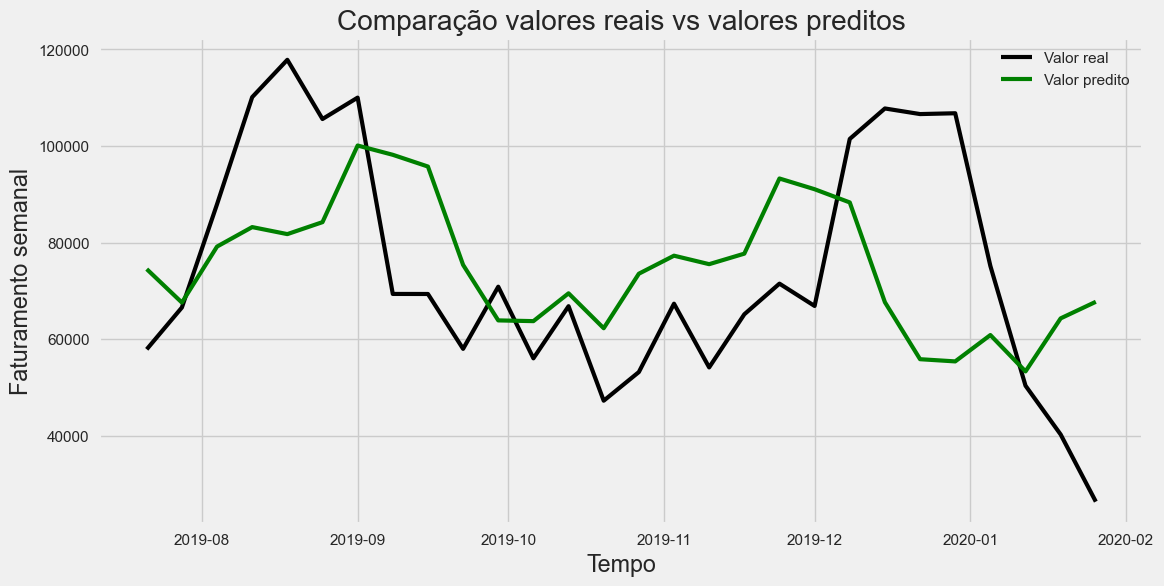

In [329]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax = sns.lineplot(x =teste.index, y = teste['TotalPurchase'], color = 'black', label='Valor real', lw=3)
ax = sns.lineplot(x = prediction.index, y = prediction[0], color = 'green',label='Valor predito', lw=3)
ax.set_xlabel('Tempo')
ax.set_ylabel('Faturamento semanal')
ax.set_title('Comparação valores reais vs valores preditos')
fig.set_size_inches(12,6)

# XGBoost

In [370]:
# PREPARANDO OS DADOS

# Agrupa os dados por data e dia, e atribui o total de venda do dia
#previsao_df = pd.DataFrame(df.groupby([df.index, 'StoreID'])['TotalPurchase'].sum())
previsao_df = pd.DataFrame(df['TotalPurchase'].resample('W').sum())

previsao_df.drop(outliers_inf.index, inplace=True)

# Reseta o indice, já que o dataframe retornou dois indices
#previsao_df.reset_index(inplace=True)

# Reatribui a data de compra como indice
#previsao_df.set_index('PurchaseDate', inplace=True)


# Irei utilizar o XGboost para o modelo de regressão, esse é um modelo supervisionado, diferente dos modelos estatísticos
# nesse eu preciso criar novas features de serie temporal, os modelos estatísticos trabalham bem com o indice do tipo datetime.
def create_features(df):
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

# Chama a função e cria as colunas de caracteristica temporal
create_features(previsao_df)

previsao_df['weekofyear'] = np.int8(previsao_df['weekofyear'])

# Adiciona as features de tempo
#previsao_df['date'] = previsao_df.index
#add_datepart(previsao_df, 'date', drop=False)

# - FERIADOS

# Instancia os feriados do pacote holidays
feriados = holidays.Brazil()

# Varre os valores de data e verifica que é feriado ou não e adiciona em uma lista

lista_feriados = []
for data in previsao_df.index:
    if data in feriados:
        lista_feriados.append(feriados.get(data))
    else:
        lista_feriados.append(False)

# Adiciona a coluna de feriados
previsao_df['Holidays'] = lista_feriados

# Remove as outras features que durante os testes foram detectadas alta correlação e insignificância.
#previsao_df.drop(columns=['date'], inplace=True)

# Ordena o indice do menor para o maior
previsao_df.sort_index(inplace=True)

In [371]:
previsao_df

TotalPurchase  dayofweek  quarter  month  year  dayofyear  \
PurchaseDate                                                              
2018-03-04          30095.8          6        1      3  2018         63   
2018-03-11          65382.8          6        1      3  2018         70   
2018-03-18          65678.2          6        1      3  2018         77   
2018-03-25          66360.0          6        1      3  2018         84   
2018-04-01          56141.4          6        2      4  2018         91   
...                     ...        ...      ...    ...   ...        ...   
2019-12-29         106780.8          6        4     12  2019        363   
2020-01-05          75159.0          6        1      1  2020          5   
2020-01-12          50369.2          6        1      1  2020         12   
2020-01-19          40259.8          6        1      1  2020         19   
2020-01-26          26363.4          6        1      1  2020         26   

              dayofmonth  weekofyear Holidays  
PurchaseDate                                   
2018-03-04             4           9    False  
2018-03-11            11          10    False  
2018-03-18            18          11    False  
2018-03-25            25          12    False  
2018-04-01             1          13   Páscoa  
...                  ...         ...      ...  
2019-12-29            29          52    False  
2020-01-05             5           1    False  
2020-01-12            12           2    False  
2020-01-19            19           3    False  
2020-01-26            26           4    False  

[99 rows x 9 columns]

In [372]:
# One Hot Encoder para transformar as variáveis dummy(categoricas), cada valor único se torna uma coluna com valores 0 ou 1.
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
previsao_df = pd.get_dummies(previsao_df, columns = ['Holidays'])
previsao_df.drop(columns='Holidays_False', inplace=True)
previsao_df.head()

TotalPurchase  dayofweek  quarter  month  year  dayofyear  \
PurchaseDate                                                              
2018-03-04          30095.8          6        1      3  2018         63   
2018-03-11          65382.8          6        1      3  2018         70   
2018-03-18          65678.2          6        1      3  2018         77   
2018-03-25          66360.0          6        1      3  2018         84   
2018-04-01          56141.4          6        2      4  2018         91   

              dayofmonth  weekofyear  Holidays_Páscoa  \
PurchaseDate                                            
2018-03-04             4           9                0   
2018-03-11            11          10                0   
2018-03-18            18          11                0   
2018-03-25            25          12                0   
2018-04-01             1          13                1   

              Holidays_Páscoa, Tiradentes  
PurchaseDate                               
2018-03-04                              0  
2018-03-11                              0  
2018-03-18                              0  
2018-03-25                              0  
2018-04-01                              0

<AxesSubplot: >

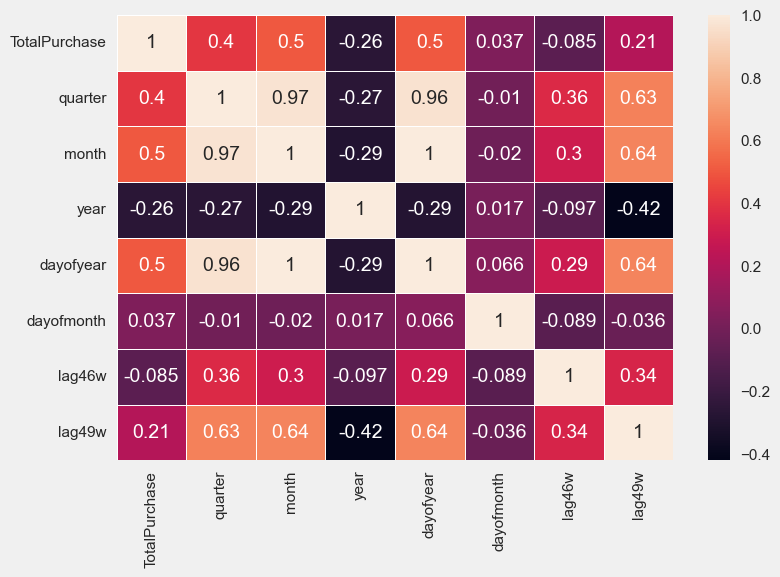

In [450]:
df_corr = previsao_df.corr()
sns.heatmap(df_corr, annot=True, linewidth=.5)

In [391]:
# Remove as colunas identificadas com multicolinearidade e insignificância
previsao_df.drop(columns=['dayofweek', 'Holidays_Páscoa', 'Holidays_Páscoa, Tiradentes', 'weekofyear'], inplace=True)

In [392]:
%%time
size = 28
train = previsao_df[:-size]
validation = previsao_df[-size:]

X_validation = validation.drop(columns='TotalPurchase')
y_validation = validation['TotalPurchase']

X_train = train.drop(columns='TotalPurchase')
y_train = train['TotalPurchase']

xgb_model = XGBRegressor()

xgb_model.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 103 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [393]:
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=3, shuffle=True)
scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold)
print(f"Mean cross-validation score: {scores.mean():.2f}" )
print(f"Scores: {scores.round(2)}")

Mean cross-validation score: 0.29
Scores: [0.11 0.29 0.45]


In [394]:
ypred = xgb_model.predict(X_validation)
timeseries_evaluation_metrics1(y_validation, ypred)


    MSE: 426363599.38
    MAE: 15161.51
    RMSE: 20648.57
    RMSLE: 0.29
    MAPE: 22.1%
    R2: 0.27


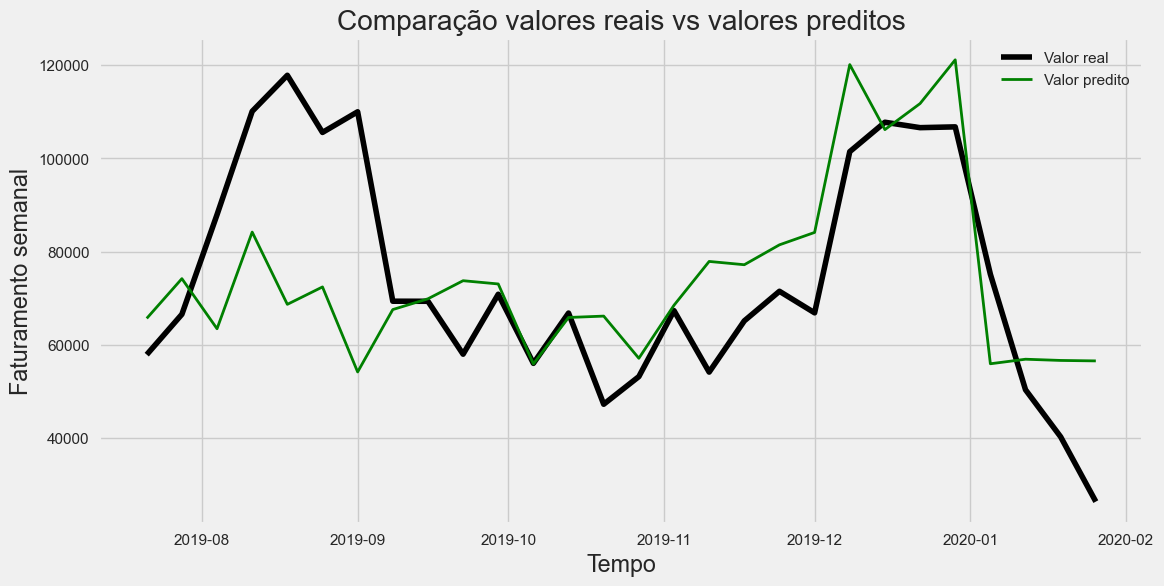

In [396]:
y_validation = pd.DataFrame(y_validation)
y_validation['prediction'] = ypred

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax = sns.lineplot(x = y_validation.index, y = y_validation['TotalPurchase'], color = 'black', label='Valor real', lw=4)
ax = sns.lineplot(x = y_validation.index, y = y_validation['prediction'], color = 'green',label='Valor predito', lw=2)
ax.set_xlabel('Tempo')
ax.set_ylabel('Faturamento semanal')
ax.set_title('Comparação valores reais vs valores preditos')
fig.set_size_inches(12,6)

<AxesSubplot: title={'center': 'Grau de importância das features'}>

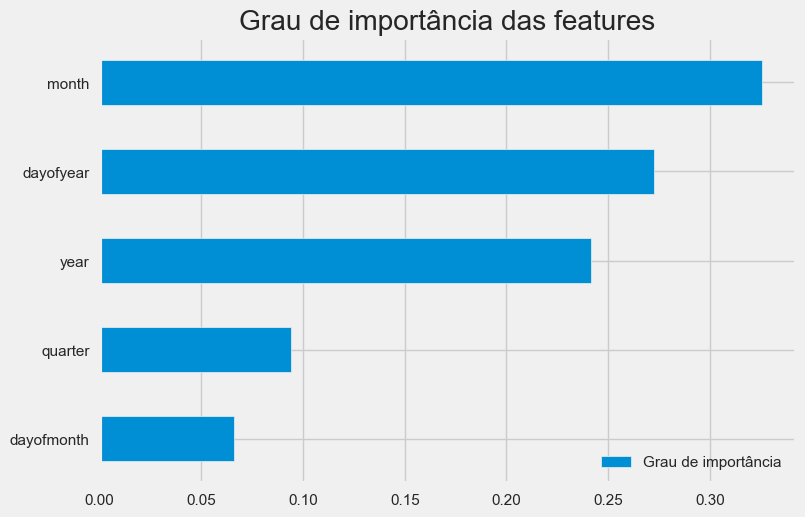

In [397]:
# Quanto maior a barra tanto positiva quanto negativa, mais influência a feature tem no modelo.
# Se o coeficiente for zero, esse então não terá nenhum impacto na previsão.
fi = pd.DataFrame(data= xgb_model.feature_importances_,
             index=xgb_model.feature_names_in_,
             columns=['Grau de importância'])

fi.sort_values(by='Grau de importância').plot(kind='barh', title = 'Grau de importância das features')

### Custom Lag Grid Search

In [411]:
%%time
from sklearn.model_selection import cross_val_score

# Data frame para receber as lojas e os melhores valores dos lags de cada uma
df_metrics_lag = pd.DataFrame(index=['MSE', 'MAE', 'RMSE', 'RMSLE', 'MAPE', 'R2', 'cv_mean_score'])

# Função para calcular as metricas de avaliação
def timeseries_evaluation_metrics2(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    rmsle = np.sqrt(mean_squared_log_error( y_true, np.abs(y_pred)))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    kfold = KFold(n_splits=3, shuffle=True)
    scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold)
    cv_mean_score = scores.mean().round(2)
    
    metrics_list = [mse, mae, rmse, rmsle, mape, r2, cv_mean_score]
    return metrics_list


for c in range(28,50):
    
    target_map = previsao_df['TotalPurchase']
    #previsao_df['lag49days'] = (previsao_df.index - pd.Timedelta('49 days')).map(target_map)
    #previsao_df['lag38days'] = (previsao_df.index - pd.Timedelta('38 days')).map(target_map)
    #previsao_df['lag100days'] = (previsao_df.index - pd.Timedelta('100 days')).map(target_map)
    previsao_df['lag46w'] = target_map.shift(46)
    previsao_df['lag49w'] = target_map.shift(49)
    #previsao_df['lag47w'] = target_map.shift(47)
    previsao_df['lagdays'] = target_map.shift(c)

    size = 28
    train = previsao_df[:-size]
    validation = previsao_df[-size:]

    X_validation = validation.drop(columns='TotalPurchase')
    y_validation = validation['TotalPurchase']

    X_train = train.drop(columns='TotalPurchase')
    y_train = train['TotalPurchase']

    xgb_model = XGBRegressor()

    xgb_model.fit(X_train, y_train)

    ypred = xgb_model.predict(X_validation)

    df_metrics_lag[f'Lag {c}'] = timeseries_evaluation_metrics2(y_validation, ypred)

# Mostra o conteúdo do data frame com os melhores lags para cada loja.    
df_metrics_lag.T.sort_values(by='RMSE').head()

CPU times: total: 15.7 s
Wall time: 6.23 s


MSE           MAE          RMSE     RMSLE      MAPE  \
Lag 49  2.853778e+08  13219.807840  16893.128454  0.248287  0.204618   
Lag 43  3.251626e+08  14100.577427  18032.264753  0.275692  0.237043   
Lag 46  3.447608e+08  14355.809431  18567.736711  0.277128  0.231419   
Lag 48  3.860229e+08  13895.946819  19647.465966  0.299352  0.214903   
Lag 32  4.279896e+08  16226.338616  20687.908391  0.309906  0.274654   

              R2  cv_mean_score  
Lag 49  0.513580           0.44  
Lag 43  0.445767           0.40  
Lag 46  0.412362           0.35  
Lag 48  0.342032           0.29  
Lag 32  0.270501          -0.04

In [412]:
previsao_df.drop(columns='lagdays', inplace=True)

In [413]:
previsao_df

TotalPurchase  quarter  month  year  dayofyear  dayofmonth  \
PurchaseDate                                                               
2018-03-04          30095.8        1      3  2018         63           4   
2018-03-11          65382.8        1      3  2018         70          11   
2018-03-18          65678.2        1      3  2018         77          18   
2018-03-25          66360.0        1      3  2018         84          25   
2018-04-01          56141.4        2      4  2018         91           1   
...                     ...      ...    ...   ...        ...         ...   
2019-12-29         106780.8        4     12  2019        363          29   
2020-01-05          75159.0        1      1  2020          5           5   
2020-01-12          50369.2        1      1  2020         12          12   
2020-01-19          40259.8        1      1  2020         19          19   
2020-01-26          26363.4        1      1  2020         26          26   

               lag46w   lag49w  
PurchaseDate                    
2018-03-04        NaN      NaN  
2018-03-11        NaN      NaN  
2018-03-18        NaN      NaN  
2018-03-25        NaN      NaN  
2018-04-01        NaN      NaN  
...               ...      ...  
2019-12-29    24963.4  57412.6  
2020-01-05    59571.4  56715.4  
2020-01-12    77735.0  54973.8  
2020-01-19    77229.6  24963.4  
2020-01-26    71390.2  59571.4  

[99 rows x 8 columns]

In [414]:
%%time
size = 28
train = previsao_df[:-size]
validation = previsao_df[-size:]

X_validation = validation.drop(columns='TotalPurchase')
y_validation = validation['TotalPurchase']

X_train = train.drop(columns='TotalPurchase')
y_train = train['TotalPurchase']

xgb_model = XGBRegressor()

xgb_model.fit(X_train, y_train)

CPU times: total: 156 ms
Wall time: 132 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [415]:
score = xgb_model.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.999999997488513


In [416]:
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=3, shuffle=True)
scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold)
print(f"Mean cross-validation score: {scores.mean():.2f}" )
print(f"Scores: {scores.round(2)}")

Mean cross-validation score: 0.30
Scores: [ 0.21  0.75 -0.04]


In [417]:
ypred = xgb_model.predict(X_validation)
timeseries_evaluation_metrics1(y_validation, ypred)


    MSE: 344760846.58
    MAE: 14355.81
    RMSE: 18567.74
    RMSLE: 0.28
    MAPE: 23.14%
    R2: 0.41


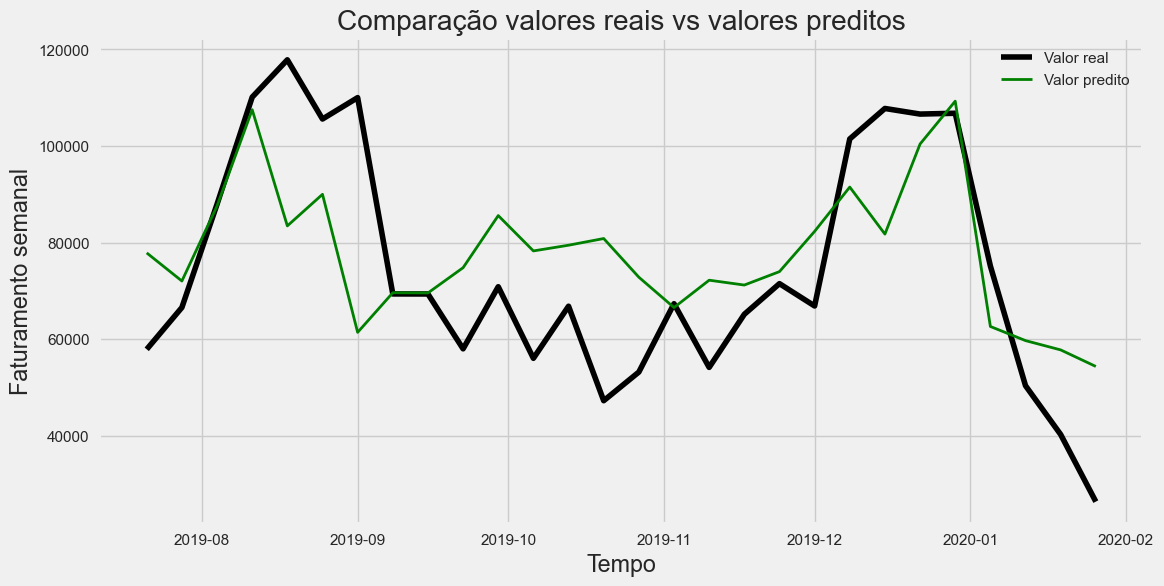

In [419]:
y_validation = pd.DataFrame(y_validation)
y_validation['prediction'] = ypred

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax = sns.lineplot(x = y_validation.index, y = y_validation['TotalPurchase'], color = 'black', label='Valor real', lw=4)
ax = sns.lineplot(x = y_validation.index, y = y_validation['prediction'], color = 'green',label='Valor predito', lw=2)
ax.set_xlabel('Tempo')
ax.set_ylabel('Faturamento semanal')
ax.set_title('Comparação valores reais vs valores preditos')
fig.set_size_inches(12,6)

In [420]:
%%time
import itertools

# Data frame para receber as lojas e os melhores valores dos lags de cada uma
df_metrics_lag = pd.DataFrame(index=['MSE', 'MAE', 'RMSE', 'RMSLE', 'MAPE', 'R2', 'params'])

size = 28
train = previsao_df[:-size]
validation = previsao_df[-size:]

X_validation = validation.drop(columns='TotalPurchase')
y_validation = validation['TotalPurchase']

X_train = train.drop(columns='TotalPurchase')
y_train = train['TotalPurchase']


learning_rate = [0.3, 0.4, 0.5, 0.7, 0.8]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8]
min_child_weight = [3, 4, 5, 6, 7, 8, 9, 10]
subsample = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
colsample_bytree = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0, 0.1, 0.2]


cont = 0
for a ,b , c, d, e, f in itertools.product(learning_rate, max_depth, min_child_weight,
                                                            subsample, colsample_bytree, gamma):
    
    xgb_model = XGBRegressor(learning_rate = a,
                             max_depth = b,
                             min_child_weight = c,
                             subsample = d,
                             colsample_bytree = e,
                             gamma = f)

    xgb_model.fit(X_train, y_train)

    ypred = xgb_model.predict(X_validation)
    
    
    mse = mean_squared_error(y_validation, ypred)
    mae = mean_absolute_error(y_validation, ypred)
    rmse = np.sqrt(mean_squared_error(y_validation, ypred))
    rmsle = np.sqrt(mean_squared_log_error(y_validation, np.abs(ypred)))
    mape = mean_absolute_percentage_error(y_validation, ypred)
    r2 = r2_score(y_validation, ypred)
    
    params = [a, b, c, d, e, f]

    df_metrics_lag[f'{cont}'] = [mse, mae, rmse, rmsle, mape, r2, params]
    
    cont += 1
# Mostra o conteúdo do data frame com os melhores lags para cada loja.    
df_metrics_lag.T.sort_values(by='RMSE')

CPU times: total: 2h 39min 38s
Wall time: 1h 11min 51s


MSE           MAE          RMSE     RMSLE      MAPE  \
46196   237641517.469294  12648.703711  15415.625757  0.218996   0.18767   
46195   237641517.469294  12648.703711  15415.625757  0.218996   0.18767   
46194   237641517.469294  12648.703711  15415.625757  0.218996   0.18767   
47732    274845548.84144   13463.89308   16578.46642  0.247057  0.217049   
47730    274845548.84144   13463.89308   16578.46642  0.247057  0.217049   
...                  ...           ...           ...       ...       ...   
58409  1771656280.831977  35394.275781  42091.047514  0.515029   0.57899   
58407  1771656280.831977  35394.275781  42091.047514  0.515029   0.57899   
59943  1771656280.831977  35394.275781  42091.047514  0.515029   0.57899   
59945  1771656280.831977  35394.275781  42091.047514  0.515029   0.57899   
58408  1771656280.831977  35394.275781  42091.047514  0.515029   0.57899   

             R2                      params  
46196  0.594945  [0.7, 7, 3, 0.7, 0.9, 0.2]  
46195  0.594945  [0.7, 7, 3, 0.7, 0.9, 0.1]  
46194  0.594945    [0.7, 7, 3, 0.7, 0.9, 0]  
47732  0.531531  [0.7, 8, 3, 0.7, 0.9, 0.2]  
47730  0.531531    [0.7, 8, 3, 0.7, 0.9, 0]  
...         ...                         ...  
58409 -2.019751  [0.8, 7, 3, 0.4, 0.8, 0.2]  
58407 -2.019751    [0.8, 7, 3, 0.4, 0.8, 0]  
59943 -2.019751    [0.8, 8, 3, 0.4, 0.8, 0]  
59945 -2.019751  [0.8, 8, 3, 0.4, 0.8, 0.2]  
58408 -2.019751  [0.8, 7, 3, 0.4, 0.8, 0.1]  

[61440 rows x 7 columns]

In [491]:
df_metrics_lag.T.sort_values(by='RMSE')

MSE           MAE          RMSE     RMSLE      MAPE  \
38620   217322621.314172  11658.750195  14741.866276  0.234839   0.18883   
38621   217322621.314172  11658.750195  14741.866276  0.234839   0.18883   
38619   217322621.314172  11658.750195  14741.866276  0.234839   0.18883   
60149   219885488.082236  12552.208119  14828.536276  0.211103   0.19072   
60148   219885488.082236  12552.208119  14828.536276  0.211103   0.19072   
...                  ...           ...           ...       ...       ...   
58382  1835970951.329795  35373.944796  42848.231601  0.518751  0.571368   
59917  1835970951.329795  35373.944796  42848.231601  0.518751  0.571368   
55313  2211934135.772393  39128.799107  47031.203852  0.576231  0.649982   
55312  2211934135.772393  39128.799107  47031.203852  0.576231  0.649982   
55311  2211934135.772393  39128.799107  47031.203852  0.576231  0.649982   

             R2                      params  
38620  0.629578  [0.7, 2, 4, 0.4, 0.4, 0.1]  
38621  0.629578  [0.7, 2, 4, 0.4, 0.4, 0.2]  
38619  0.629578    [0.7, 2, 4, 0.4, 0.4, 0]  
60149   0.62521  [0.8, 8, 4, 0.5, 0.4, 0.2]  
60148   0.62521  [0.8, 8, 4, 0.5, 0.4, 0.1]  
...         ...                         ...  
58382 -2.129374  [0.8, 7, 3, 0.3, 0.7, 0.2]  
59917 -2.129374  [0.8, 8, 3, 0.3, 0.7, 0.1]  
55313 -2.770196  [0.8, 5, 3, 0.3, 0.8, 0.2]  
55312 -2.770196  [0.8, 5, 3, 0.3, 0.8, 0.1]  
55311 -2.770196    [0.8, 5, 3, 0.3, 0.8, 0]  

[61440 rows x 7 columns]

In [438]:
%%time
size = 28
train = previsao_df[:-size]
validation = previsao_df[-size:]

X_validation = validation.drop(columns='TotalPurchase')
y_validation = validation['TotalPurchase']

X_train = train.drop(columns='TotalPurchase')
y_train = train['TotalPurchase']

xgb_model = XGBRegressor(learning_rate = 0.7,
                         max_depth = 7,
                         min_child_weight = 3,
                         subsample = 0.7,
                         colsample_bytree = 0.9,
                         gamma = 0.2) 

xgb_model.fit(X_train, y_train)

CPU times: total: 156 ms
Wall time: 81 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [443]:
kfold = KFold(n_splits=3, shuffle=False)
scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold)
print(f"Mean cross-validation score: {scores.mean():.2f}" )
print(f"Scores: {scores.round(2)}")

Mean cross-validation score: -0.02
Scores: [-0.48  0.34  0.08]


In [440]:
ypred = xgb_model.predict(X_validation)
timeseries_evaluation_metrics1(y_validation, ypred)


    MSE: 237641517.47
    MAE: 12648.7
    RMSE: 15415.63
    RMSLE: 0.22
    MAPE: 18.77%
    R2: 0.59


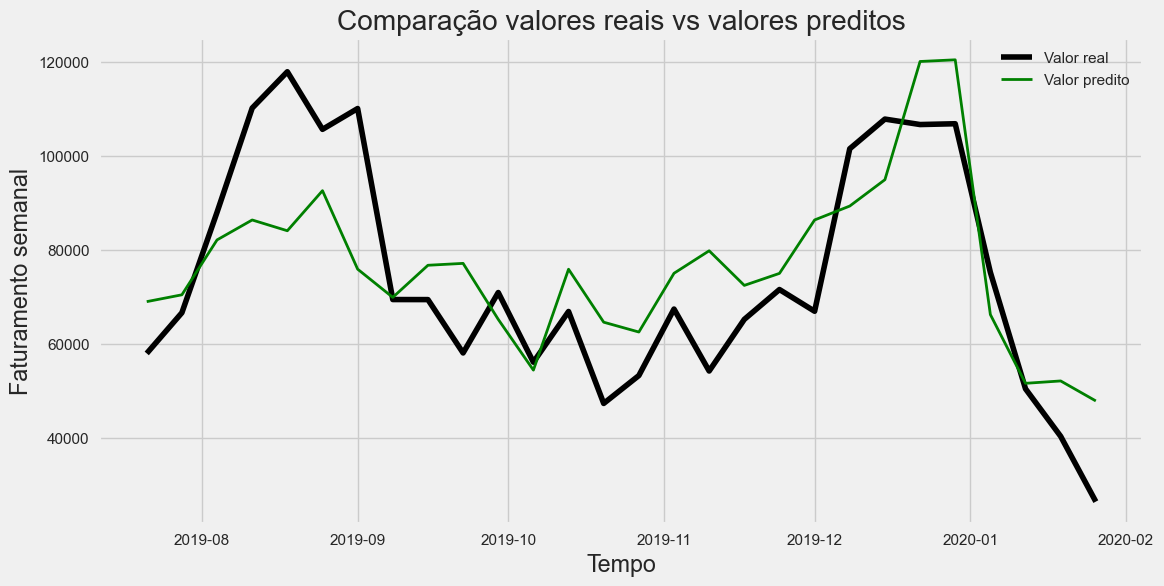

In [441]:
y_validation = pd.DataFrame(y_validation)
y_validation['prediction'] = ypred

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax = sns.lineplot(x = y_validation.index, y = y_validation['TotalPurchase'], color = 'black', label='Valor real', lw=4)
ax = sns.lineplot(x = y_validation.index, y = y_validation['prediction'], color = 'green',label='Valor predito', lw=2)
ax.set_xlabel('Tempo')
ax.set_ylabel('Faturamento semanal')
ax.set_title('Comparação valores reais vs valores preditos')
fig.set_size_inches(12,6)

<AxesSubplot: title={'center': 'Grau de importância das features'}>

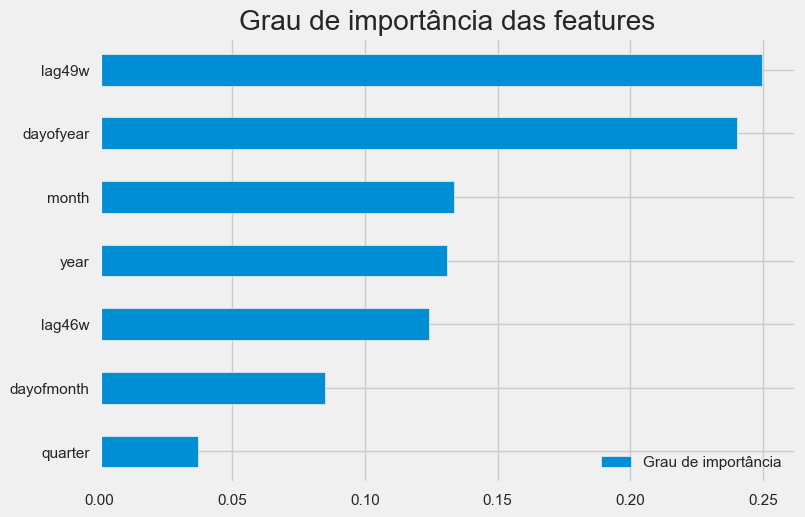

In [430]:
# Quanto maior a barra tanto positiva quanto negativa, mais influência a feature tem no modelo.
# Se o coeficiente for zero, esse então não terá nenhum impacto na previsão.
fi = pd.DataFrame(data= xgb_model.feature_importances_,
             index=xgb_model.feature_names_in_,
             columns=['Grau de importância'])

fi.sort_values(by='Grau de importância').plot(kind='barh', title = 'Grau de importância das features')